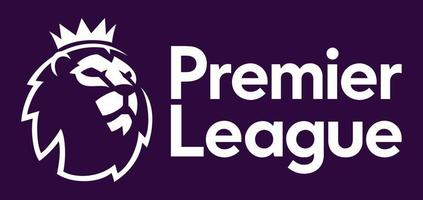

# **SC1015 Project - English Premier League**

Tejeswara Nehru (U2220197K) <br>
Michael Santoso (U2221525L) <br>
Nguyen Tien Dat (John) (U2220949L) <br>

**Context + Abstract**
*   Data from English Premier League 2000-2022 (https://www.kaggle.com/datasets/saife245/english-premier-league)
*   Why football? Football is played by 250 million players in over 200 countries (most popular sport globally). The English Premier League (EPL) is the most popular domestic team in the world.
*   As avid supporters of football, we are interested in learning how machine learning can help us predict the football ranking, for our favourite team in particular.

**Exploratory Data Analysis**

1.   Calculate the average number of goals scored by each team in home and away matches. Hence, does home advantage play a big factor in match performance? 
2.   Determine which teams have the highest and lowest goal differences, and compare this to their overall performance in the league 
3.   Analyze how much of an impact a team's form (as indicated by their previous points earned) has on their likelihood of winning a match 

**Predicting the EPL Table Ranking**

*   Using data from the EPL seasons 2000-2017 to train and test, we are trying to predict the standing for the 2017-2018 season. 
*   The method for prediction are linear regression, neural network (TenserFlow Keras), and random forest regression.
*   The resulting table ranking will be compared respectively to the actual ranking for season 2017-2018, checking for accuracy and difference.
*   Personal objective: Predict the top 6 teams that are going into the Champtions/Europa League



## Importing Library and File

In [ ]:
#General Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
import math
import io
from ctypes import sizeof
from IPython.display import display_html 

#Library for Linear Regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

#Library for Neural Network
import tensorflow as tf
import sys
import os
import warnings

#Library for Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
#Importing files from local to the notebook
from google.colab import files
uploaded = files.upload()

Saving final_dataset.csv to final_dataset.csv


## **Data Cleaning** 

In [ ]:
dataset = pd.read_csv(io.BytesIO(uploaded['final_dataset.csv']))
#If opening the file using local reader (not Google Collab), use the code below instead
#dataset = pd.read_csv('final_dataset.csv') 

#Remove empty columns in the file
dataset.drop(dataset.columns[dataset.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

dataset

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,19/08/00,Charlton,Man City,4,0,H,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
2,19/08/00,Coventry,Middlesbrough,1,3,NH,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
3,19/08/00,Derby,Southampton,2,2,NH,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4,19/08/00,Leeds,Everton,2,0,H,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,13/05/18,Newcastle,Chelsea,3,0,H,36,62,47,35,...,0,0,1,0,0,0,-0.289474,0.710526,-0.763158,-0.263158
6836,13/05/18,Southampton,Man City,0,1,NH,37,105,55,27,...,0,0,1,0,0,0,-0.473684,2.052632,-1.605263,-0.131579
6837,13/05/18,Swansea,Stoke,1,2,NH,27,33,54,67,...,0,0,0,0,0,0,-0.710526,-0.894737,0.078947,-0.052632
6838,13/05/18,Tottenham,Leicester,5,4,H,69,52,32,55,...,0,0,0,0,0,0,0.973684,-0.078947,0.710526,0.078947


In [ ]:
#Data cleaning by taking in only the 18 teams that have been playing for 18 years - data spanning the full 18 years (taking out recent promoted/relegated teams)
team = ["Man City", "West Ham", "Arsenal", "Man United", "Tottenham", "Liverpool", "Newcastle", "Chelsea", "West Brom", "Crystal Palace", "Stoke", "Everton", "Leicester", "Bournemouth", "Swansea", "Southampton", "Watford", "Burnley"]
datatemp = dataset[dataset['HomeTeam'].isin(team)] #Taking only the 18 teams from HomeTeam
datatemp2 = datatemp[datatemp['AwayTeam'].isin(team)] #Taking only the 18 teams from AwayTeam
dataset_18Teams = datatemp2.copy() 

# Adding Month and Year for the columns so sorting teams by season is easier
dataset_18Teams["Year"] = 0
dataset_18Teams["Month"] = 0
dataset_18Teams = dataset_18Teams.reset_index()
dataset_18Teams.drop(dataset_18Teams.columns[dataset_18Teams.columns.str.contains('index',case = False)],axis = 1, inplace = True)

#Inserting the Month and Year respectively to the rows
for date in range(len(dataset_18Teams)):
  day,month,year = dataset_18Teams["Date"][date].split('/') 
  year = int(year)
  month = int(month)
  dataset_18Teams.loc[date, "Year"] = year
  dataset_18Teams.loc[date, "Month"] = month

#Fix some years not being added properly (Some years are set as 2002 instead of 2 and 2003 instead of 3)
for i in range(len(dataset_18Teams)):
  if dataset_18Teams["Year"][i]== 2002:
    dataset_18Teams.loc[i, "Year"] = 2
  elif dataset_18Teams["Year"][i] == 2003:
    dataset_18Teams.loc[i, "Year"] = 3

#Removing the data where the Match Week is 1
#This is because some of the variables used later (HTFormPoints/ATFormPoints) are 0 when the week is 1 (We delete to not affect the predicted value)
week1_data_to_remove =  dataset_18Teams.loc[dataset_18Teams["MW"] == 1].index
dataset_18Teams = dataset_18Teams.drop(week1_data_to_remove)
dataset_18Teams = dataset_18Teams.reset_index()
dataset_18Teams.drop(dataset_18Teams.columns[dataset_18Teams.columns.str.contains('index',case = False)],axis = 1, inplace = True)

#Print dataset_18Teams
dataset_18Teams

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,Year,Month
0,21/08/00,Arsenal,Liverpool,2,0,H,0,1,1,0,...,0,0,0,0,-0.500000,0.500000,-1.500000,-1.500000,0,8
1,23/08/00,West Ham,Leicester,0,1,NH,2,0,4,0,...,0,0,0,0,-1.000000,0.000000,-0.500000,-0.500000,0,8
2,26/08/00,Newcastle,Tottenham,2,0,H,3,4,4,2,...,0,0,0,0,-0.333333,0.666667,-0.333333,-0.333333,0,8
3,26/08/00,Southampton,Liverpool,3,3,NH,3,1,4,2,...,0,0,0,0,-0.333333,-0.333333,-0.666667,-0.666667,0,8
4,26/08/00,West Ham,Man United,2,2,NH,2,3,5,1,...,0,0,0,0,-1.000000,0.666667,-1.333333,-1.333333,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,13/05/18,Newcastle,Chelsea,3,0,H,36,62,47,35,...,1,0,0,0,-0.289474,0.710526,-0.763158,-0.263158,18,5
2535,13/05/18,Southampton,Man City,0,1,NH,37,105,55,27,...,1,0,0,0,-0.473684,2.052632,-1.605263,-0.131579,18,5
2536,13/05/18,Swansea,Stoke,1,2,NH,27,33,54,67,...,0,0,0,0,-0.710526,-0.894737,0.078947,-0.052632,18,5
2537,13/05/18,Tottenham,Leicester,5,4,H,69,52,32,55,...,0,0,0,0,0.973684,-0.078947,0.710526,0.078947,18,5


In [ ]:
#data20172018: Taking out the last season of the EPL (Season 2017-2018) for a result that we are trying to predict
data20172018 = dataset_18Teams.copy()
del1 = data20172018.loc[data20172018["Year"]<17 ].index 
del2 = data20172018.loc[(data20172018["Year"]==17) & (data20172018["Month"]<8)].index
del3 = data20172018.loc[(data20172018["Year"]==2002) | (data20172018["Year"]==2003)].index
data20172018 = data20172018.drop(del1)
data20172018 = data20172018.drop(del2)
data20172018 = data20172018.drop(del3)
data20172018.drop(data20172018.columns[data20172018.columns.str.contains('index',case=False)],axis=1,inplace=True)
data20172018 = data20172018.reset_index()
print(data20172018[["Year","Month","MW"]])


#datasettesttrain: Taking out the last remaining seasons of the EPL (Season 2000-2017) for a result that we are trying to test and train
datasettesttrain = dataset_18Teams.copy()
del4 = datasettesttrain.loc[datasettesttrain["Year"]>17].index
del5 = datasettesttrain.loc[(datasettesttrain["Year"]==17) & (datasettesttrain["Month"]>7)].index
datasettesttrain = datasettesttrain.drop(del4)
datasettesttrain = datasettesttrain.drop(del5)
datasettesttrain.drop(datasettesttrain.columns[datasettesttrain.columns.str.contains('index',case=False)],axis=1,inplace=True)
datasettesttrain = datasettesttrain.reset_index()
print(datasettesttrain[["Year","Month","MW"]])

     Year  Month    MW
0      17      8   2.0
1      17      8   2.0
2      17      8   2.0
3      17      8   2.0
4      17      8   2.0
..    ...    ...   ...
293    18      5  38.0
294    18      5  38.0
295    18      5  38.0
296    18      5  38.0
297    18      5  38.0

[298 rows x 3 columns]
      Year  Month    MW
0        0      8   2.0
1        0      8   2.0
2        0      8   3.0
3        0      8   3.0
4        0      8   3.0
...    ...    ...   ...
2236    17      5  38.0
2237    17      5  38.0
2238    17      5  38.0
2239    17      5  38.0
2240    17      5  38.0

[2241 rows x 3 columns]


Data cleaning is done!
*   datasettesttrain is data ready for testing and training
*   data20172018 is data reserved for predicting/checking the accuracy of the ML models

## **Exploratory Data Analysis**

1.   Calculate the average number of goals scored by each team in home and away matches. Hence, does home advantage play a big factor in match performance?
2.   Determine which teams have the highest and lowest goal differences, and compare this to their overall performance in the league 
3.   Analyze how much of an impact a team's form (as indicated by their previous points earned) has on their likelihood of winning a match 

To answer the questions, let us clean the data first before presenting it.

In [ ]:
#Dataframe of teams and their performances
data_analysis = dataset_18Teams.copy()
factors = ["Teams", "Matches","Points/season", "Goals/match", "Conceded/match", "Win%","Draw%","Loss%", "HomeWin%", "AwayWin%","HomeGoal/mt","AwayGoal/mt","ScoringHome/Away%", "GD/season", "FormAffect%"]
#Teams are the 18 teams currently in the table
#Matches are the total number of matches the team played for
#Goals/Match is the the average number of goals in one match
#Conceded/Match is the the average number of goals conceded in one match
#Win% is the percentage of win over all the matches
#HomeWin% is the percentage of home win over the number of home matches
#AwayWin% is the percentage of away win over the number of away matches
#HomeGoal/mt is the number of home goals over the number of home matches
#AwayGoal/mt is the number of away goals over the number of away matches
#GD/Season is the goal difference per season
#FormAffect% is the percentage of winning a match if the teams have a worse form points than the opponent

#Declaring the variables
matches = [0]*18
pts = [0]*18
goals = [0]*18
against = [0]*18
win_per = [0]*18
draw_per = [0]*18
loss_per = [0]*18
hw_per = [0]*18
aw_per = [0]*18
hmg_per = [0]*18
awg_per = [0]*18
handagoalperc = [0]*18
gd = [0]*18
form = [0]*18
variables = [team, matches,pts, goals, against, win_per,draw_per,loss_per, hw_per, aw_per, hmg_per, awg_per,handagoalperc, gd, form]

#calculating the variables
data_allseason = pd.DataFrame(data=None,columns=factors[:])

#loop to run against all the teams seperately
for i in range(len(team)):
  game=away_goal=goal=win=draw=loss=home_win=away_win=home_game=away_game=home_goals=away_goals=form_count=point=0

  #We start iterating through all data to extract data about team i
  for j in range(len(data_analysis)):   
    if((data_analysis["HomeTeam"][j] == team[i]) or (data_analysis["AwayTeam"][j] == team[i])):
      game+=1
      if(data_analysis["HomeTeam"][j] == team[i]):
        home_game+=1
      else:
        away_game+=1

    #Considering cases for team playing home team matches   
    if(data_analysis["HomeTeam"][j] == team[i]):
      goal+=data_analysis["FTHG"][j]
      home_goals+=data_analysis["FTHG"][j]
      away_goal+=data_analysis["FTAG"][j]

      #Considering cases when team wins in home games
      if(data_analysis["FTHG"][j] > data_analysis["FTAG"][j]):
        win+=1
        home_win+=1
        point+=3
        #Computing the form formpts
        if(data_analysis["HTFormPts"][j]<data_analysis["ATFormPts"][j]):
          form_count+=1

      #Considering cases when team loses in home game
      elif(data_analysis["FTHG"][j] < data_analysis["FTAG"][j]):
        loss+=1

      #Considering cases when the match is draw
      elif(data_analysis["FTHG"][j] == data_analysis["FTAG"][j]):
        draw+=1
        point+=1
    
    #Considering cases for team playing away team matches
    elif(data_analysis["AwayTeam"][j] == team[i]):
      goal+=data_analysis["FTAG"][j]
      away_goals+=data_analysis["FTAG"][j]
      away_goal+=data_analysis["FTHG"][j]

      #Considering cases when team wins in away games
      if(data_analysis["FTHG"][j] < data_analysis["FTAG"][j]):
        win+=1
        away_win+=1
        point+=3
        #Computing the form pts
        if(data_analysis["HTFormPts"][j] > data_analysis["ATFormPts"][j]):
          form_count+=1

      #Considering cases when team loses in away games
      elif(data_analysis["FTHG"][j] > data_analysis["FTAG"][j]):
        loss+=1

      #Considering cases when the match is draw
      elif(data_analysis["FTHG"][j] == data_analysis["FTAG"][j]):
        draw+=1
        point+=1
  
  #Start to combine and calculate all the data into one big data
  matches[i] = game
  season = math.ceil(game/38)
  noofseasons = math.ceil(game/season)
  pts[i] = '{:.2f}'.format(point/noofseasons)
  gd[i] = '{:.2f}'.format((goal-away_goal)/season)
  if(home_game!=0):
    hw_per[i] = '{:.2f}'.format((home_win/home_game)*100)
    hmg_per[i] = '{:.2f}'.format((home_goals/home_game))
    form[i] = '{:.2f}'.format((form_count/(home_win+away_win))*100)
  if(away_game!=0):
    aw_per[i] = '{:.2f}'.format((away_win/away_game)*100)
    awg_per[i] = '{:.2f}'.format((away_goals/away_game))
  if(game != 0):
    win_per[i] = '{:.2f}'.format((win/game)*100)
    draw_per[i] = '{:.2f}'.format((draw/game)*100)
    loss_per[i] = '{:.2f}'.format((loss/game)*100)
    goals[i] = goal/game
    against[i] = away_goal/game
  handagoalperc[i]='{:.2f}'.format((((home_goals/home_game)-(away_goals/away_game))/(home_goals/home_game))*100)
for k in range(len(variables)):
  data_allseason[factors[k]] =  variables[k]
data_allseason["Points/season"] = data_allseason["Points/season"].astype(float)

#The order is done by points followed by goal difference, just in the Official EPL ranking
data_allseason = data_allseason.sort_values(by=['Points/season','GD/season'], ascending=False)
data_allseason


,Teams,Matches,Points/season,Goals/match,Conceded/match,Win%,Draw%,Loss%,HomeWin%,AwayWin%,HomeGoal/mt,AwayGoal/mt,ScoringHome/Away%,GD/season,FormAffect%
3,Man United,391,20.86,1.751918,0.994885,56.52,22.51,20.97,66.15,46.94,1.94,1.57,19.20,26.91,17.19
7,Chelsea,393,20.39,1.727735,0.956743,54.45,23.41,22.14,63.40,45.73,1.96,1.50,23.75,27.55,14.49
2,Arsenal,392,19.36,1.760204,1.168367,50.51,26.28,23.21,65.98,35.35,2.09,1.44,31.05,21.09,24.75
5,Liverpool,392,18.22,1.627551,1.109694,47.45,25.00,27.55,57.87,36.92,1.86,1.39,24.92,18.45,23.12
4,Tottenham,394,16.28,1.472081,1.380711,41.37,24.62,34.01,51.76,30.77,1.71,1.23,28.47,3.27,31.29
0,Man City,377,15.87,1.639257,1.153846,46.95,19.10,33.95,57.67,36.17,1.86,1.42,23.53,18.30,24.29
11,Everton,393,13.78,1.234097,1.389313,32.57,28.50,38.93,44.04,21.50,1.48,1.00,32.28,-5.55,35.16
6,Newcastle,342,10.26,1.195906,1.654971,30.41,22.81,46.78,42.11,18.71,1.46,0.94,35.74,-17.44,41.35
15,Southampton,267,9.38,1.149813,1.404494,31.46,25.09,43.45,41.48,21.21,1.37,0.92,32.56,-8.50,50.00
1,West Ham,338,9.00,1.094675,1.647929,25.15,25.74,49.11,32.75,17.37,1.26,0.92,27.00,-20.78,42.35


Note that HomeWin% and AwayWin% is calculated by HomeWin = (HomeWin/HomeMatches)*100 to see the affect of home ground. That is why HomeWin% and AwayWin% do not add up to 100%<br>

Note that FormAffect% is calculating the chances of winning with a lower form points. This means that the number will describe the chances of winning for the team if it has less form points than the opponent.

Note that ScoringHomeAway% is calculated by ScoringHomeAway = ((HomeGoal/Match divide by AwayGoal/Match) divide by HomeGoal/Match)*100. This shows the team's chances of scoring in home field compared to away field. A positive value indicate that the team scores more goal in home field, and vice versa.

### **Answering the Exploratory Data Analysis**

1.   **Calculate the average number of goals scored by each team in home and away matches. Hence, does home advantage play a big factor in match performance?**
<br>

As seen from the table below, we can see that there is a difference in average number of goals scored by each team in home and away matches. Generally, we can see a trend showing that the team scores more goals in the home field as compared to the away field. 
<br>
<br>
This can also be seen in the ScoringHomeAway%, which indicates the difference between the team scoring in home field as compared as compared to the away field. For example, Man United has a 19.20% for ScoringHomeAway%, showing how the home goals are 19.20% higher than away goals for Man United in particular.
In general, the positive value in ScoringHomeAway% indicates that the team has scored more goals in the home field compared to the away field. Since every team in the table above has positive values ranging from 11.16% to 38.65%, we can see that home team gives has a higher average number of goals. 
<br>
<br>
Using this information, we can deduce that home field gives some factors in winning since teams are more likely to score there. In addition, we can also deduce this outcome from the table above, where the HomeWin% is comparably higher than AwayWin% for the teams. The win percentage varies again, from around 1.5 times more likely to score in home field to more than 2 times more likely to score in home field. This shows how all the teams perform better in home field as compared to away field, hence showing how home advantage plays a big factor in match performance.

In [ ]:
data_allseason[["Teams", "HomeGoal/mt", "AwayGoal/mt", "ScoringHome/Away%", "HomeWin%", "AwayWin%"]]

,Teams,HomeGoal/mt,AwayGoal/mt,ScoringHome/Away%,HomeWin%,AwayWin%
3,Man United,1.94,1.57,19.20,66.15,46.94
7,Chelsea,1.96,1.50,23.75,63.40,45.73
2,Arsenal,2.09,1.44,31.05,65.98,35.35
5,Liverpool,1.86,1.39,24.92,57.87,36.92
4,Tottenham,1.71,1.23,28.47,51.76,30.77
0,Man City,1.86,1.42,23.53,57.67,36.17
11,Everton,1.48,1.00,32.28,44.04,21.50
6,Newcastle,1.46,0.94,35.74,42.11,18.71
15,Southampton,1.37,0.92,32.56,41.48,21.21
1,West Ham,1.26,0.92,27.00,32.75,17.37


2.   **Determine which teams have the highest and lowest goal differences, and compare this to their overall performance in the league**

From the below table, goal difference (GD) is one of the major factors in evaluating the the team's overall perfomance. This is because teams with higher GD are generally ranked higher in the league,and vice versa.
<br>
<br>
However, there are some exceptions to this trend, where GD alone does not necessarily translate to higher ranking. For example, 
*   Chelsea has higher GD compared to ManUnited but ManUnited have higher points/season and win%. This means that ManUnited performs better than Chelsea in this case despite the lower GD.
*   Newcastle has a slightly higher ranking as compared to Southampton, shown by the similar ranking and win%. Yet, Newcastle has a poorer GD (-17.4) compared to Southampton (-8.5)
<br>

The reasons why GD gives rise to such exceptions are because of the way GD is measured: 
*   Playing style. Different playing style leads to different value of GD. Defensive playing style lead to lower GD rate since the team is likely to score but also less likely to concede. This is vice versa for aggresive playing style.
*   Strength of opponent. GD varies on strength of opponent faced. Facing tougher opponent will make the team less likely to score and more likely to concede.
*   Goalkeeper performance. GD relies heavily on how the goalkeeper performs on the day of the match.
*   Luck. Football involves a lot of luck in the match itself since many things can go either way. A team may create many chances in scoring but never scoring leads to a lower GD.

As a result, the GD depends on various factors, leading to some exceptions on how GD could be used to predict team's performance. 
<br>
<br>
This shows that GD gives a positive correlation to team's performance, albeit having some exceptions. Overall, the team with the highest GD, Chelsea, is ranked second from the top, while the team with the lowest GD, Watford, is ranked the very bottom. Consequeuntly, this shows how GD is a fairly good indicator to the team's perfomance

In [ ]:
data_allseason[["Teams","GD/season", "Points/season", "Win%"]]

,Teams,GD/season,Points/season,Win%
3,Man United,26.91,20.86,56.52
7,Chelsea,27.55,20.39,54.45
2,Arsenal,21.09,19.36,50.51
5,Liverpool,18.45,18.22,47.45
4,Tottenham,3.27,16.28,41.37
0,Man City,18.30,15.87,46.95
11,Everton,-5.55,13.78,32.57
6,Newcastle,-17.44,10.26,30.41
15,Southampton,-8.50,9.38,31.46
1,West Ham,-20.78,9.00,25.15


3.   **Analyze how much of an impact a team's form (as indicated by their previous points earned) has on their likelihood of winning a match**

Note again that the FormAffect% describes team's chances of winning if it has less form points than the opponent. This is calculated by having the number of times team wins with lower form points divided by the number of total wins by the team. 
<br>
<br>
From the table below, we can see that FormAffect% is considerably low, which is less than 50% for most of the teams. This shows that form points have an impact on a team's likelihood of winning a match (with lower form points, teams are not as likely to win the match).
<br>
<br>
Undoubtedly, there are some exceptions in the trend.

*   The reason behind the higher percentage of FormAffect% is that most of them are attributed to the outlier teams. These teams have played very few matches in the Premier League, being relegated or not available for most of the years, resulting in the higher percentage.
*   Moreover, a possible reason behind low FormAffect% for top teams is that the calculation behind FormAffect% depends if they win when form points lower than enemy, and since top teams tend to have higher form points, these percentages are lowered.
<br>
<br>
Overall, we can see that there is a positive linear relationship between a team's form and their likelihood of winning a match. By having a worse form than the opponent, teams have a smaller probability of winning that match.

In [ ]:
data_allseason[["Teams", "Matches", "FormAffect%"]]

,Teams,Matches,FormAffect%
3,Man United,391,17.19
7,Chelsea,393,14.49
2,Arsenal,392,24.75
5,Liverpool,392,23.12
4,Tottenham,394,31.29
0,Man City,377,24.29
11,Everton,393,35.16
6,Newcastle,342,41.35
15,Southampton,267,50.00
1,West Ham,338,42.35


## **Linear Regression Model**

####**Which factors to choose for linear regression?**
Since all the 10 numerical unique factors in the dataset seemed to be related in predicting the results, so we decided to add all of them. Unique numerical factors here represents the factors which does not overlap such as taking form points and difference of points and difference of form points between teams into consideration and not taking win streak of the team, since they also represents the same meaning as the other 3 factors mentioned above.

In [ ]:
#Setting the 10 unique variables to predict the goals
factors_assumed = pd.DataFrame(datasettesttrain[["HTFormPts","ATFormPts","HTGD","ATGD","DiffPts","DiffFormPts","HTGS","ATGS","HTGC","ATGC"]])
#HTGS is the goals scored by the home team so far in the season
#ATGS is the goals scored by the away team so far in the season
#HTGC is the goals conceded by the home team so far in the season
#ATGC is the goals conceded by the away team so far in the season
#The other 6 factors are mentioned in the next analysis

#Setting the 2 dependent variables to be predicted(1st Variable is Goals Scored, 2nd Variable is Goals Conceded)
goalsF_assumed = pd.DataFrame(datasettesttrain['FTHG'])
goalsC_assumed = pd.DataFrame(datasettesttrain['FTAG'])

# Split the data into training and testing sets and we create 2 sets of these (one for predicting goal scored by the team and other for goals conceded by the team)
x_train_trial, x_test_trial, y_train_trial, y_test_trial = train_test_split(factors_assumed, goalsF_assumed, test_size=0.2,random_state=42) # Predicting Goals Scored by team 
x_train2_trial, x_test2_trial, y_train2_trial, y_test2_trial = train_test_split(factors_assumed, goalsC_assumed, test_size=0.2,random_state=42) # Predicting Goals Conceded by team

#Checking sample sizes
print("Train Set :", y_train_trial.shape, x_train_trial.shape)
print("Test Set  :", y_test_trial.shape, x_test_trial.shape)

# Summary Statistics for Response
y_train_trial.describe()
# Summary Statistics for Predictors
x_train_trial.describe()

Train Set : (1792, 1) (1792, 10)
Test Set  : (449, 1) (449, 10)


,HTFormPts,ATFormPts,HTGD,ATGD,DiffPts,DiffFormPts,HTGS,ATGS,HTGC,ATGC
count,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000
mean,7.255022,7.383371,0.203672,0.236695,-0.025280,-0.015668,27.999442,28.232701,23.575335,23.211496
std,3.540344,3.508594,0.681457,0.681179,0.671596,0.425444,18.445976,18.346591,15.094044,14.774139
min,0.000000,0.000000,-2.000000,-2.000000,-2.300000,-2.250000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,5.000000,-0.290323,-0.272727,-0.500000,-0.176471,13.000000,13.000000,11.000000,11.000000
50%,7.000000,7.000000,0.142857,0.181818,0.000000,0.000000,26.000000,27.000000,22.000000,22.000000
75%,10.000000,10.000000,0.705882,0.736842,0.469210,0.166667,40.000000,40.000000,34.000000,34.000000
max,15.000000,15.000000,4.000000,3.500000,2.000000,2.000000,100.000000,96.000000,80.000000,68.000000


<Axes: >

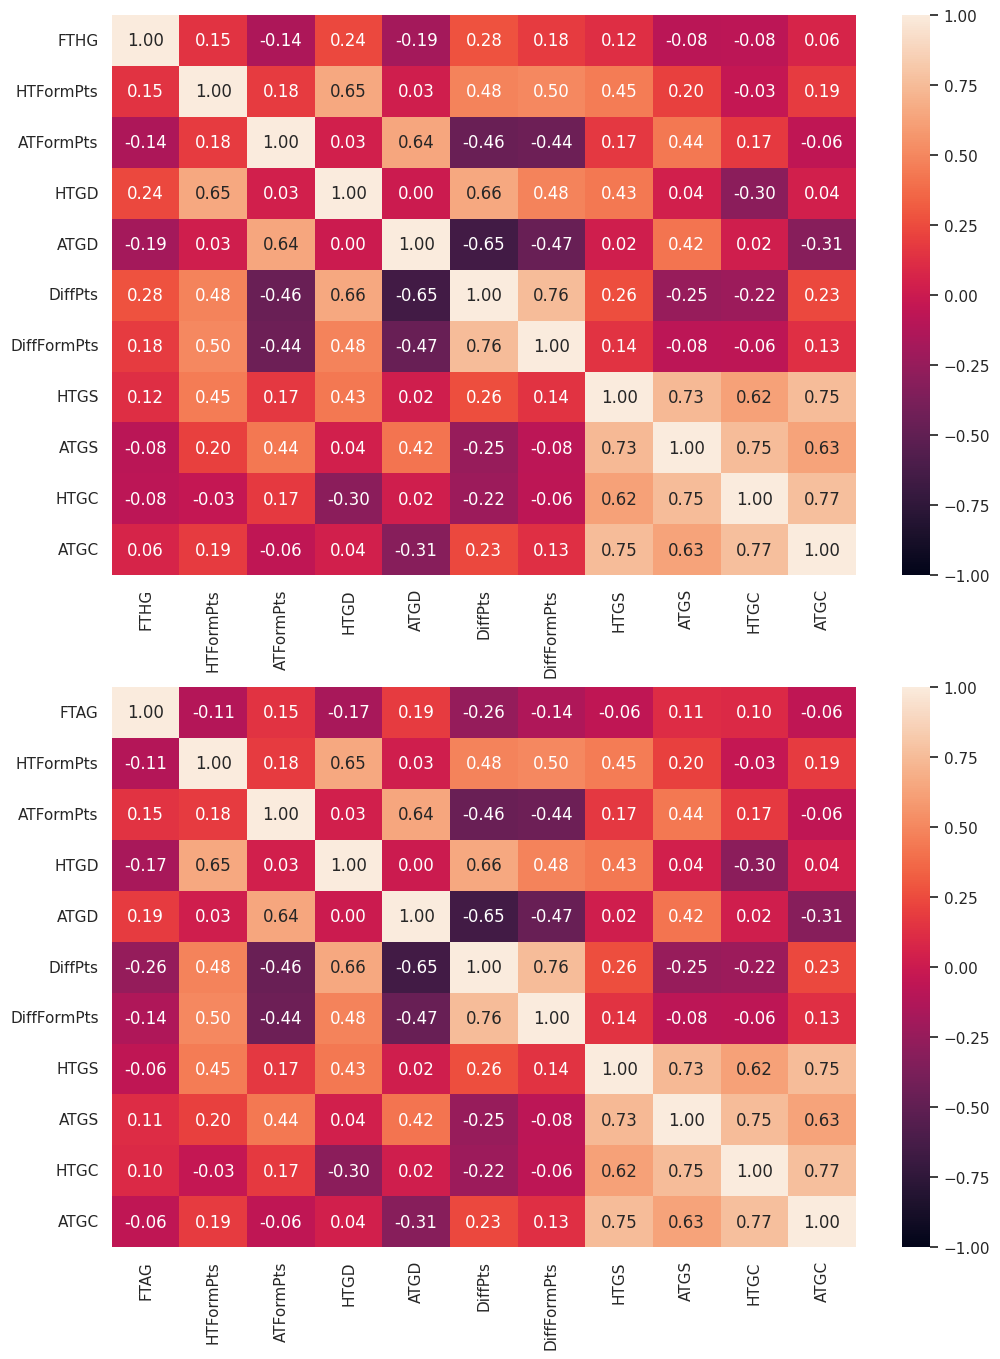

In [ ]:
# Correlation between Response and the Predictors
trainDF_trial = pd.concat([y_train_trial, x_train_trial], axis = 1).reindex(y_train_trial.index)
trainDF2_trial = pd.concat([y_train2_trial, x_train2_trial], axis = 1).reindex(y_train2_trial.index)

f, axes = plt.subplots(2, 1, figsize=(12, 16))
sb.heatmap(trainDF_trial.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", ax=axes[0])
sb.heatmap(trainDF2_trial.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", ax=axes[1])

In [ ]:
# select the predictor variables and training variables
training_vars = ["FTHG", "FTAG"]
predictors = ["HTFormPts","ATFormPts","HTGD","ATGD","DiffPts","DiffFormPts","HTGS","ATGS","HTGC","ATGC"]

# create a new DataFrame containing only the selected variables
selected_vars_df = datasettesttrain[training_vars+predictors]

# calculate the correlation matrix
corr_matrix = selected_vars_df.corr()

print(corr_matrix.loc[predictors, training_vars])

                 FTHG      FTAG
HTFormPts    0.135478 -0.120458
ATFormPts   -0.139104  0.155145
HTGD         0.231935 -0.176137
ATGD        -0.185940  0.199199
DiffPts      0.270698 -0.262995
DiffFormPts  0.165208 -0.158078
HTGS         0.125194 -0.069863
ATGS        -0.075325  0.109041
HTGC        -0.068171  0.092602
ATGC         0.081351 -0.054694


####**Deciding which factors to use**
After performing a correlation analysis between the predictor variables and the response variables (FTHG and FTAG), I have decided to select only **HTFormPts, ATFormPts, HTGD, ATGD, DiffPts, and DiffFormPts** as my predictor variables. These variables exhibit a moderate to strong correlation with the response variables, with correlation coefficients ranging above 0.15 on an average for both response variables.

On the other hand, I decided to exclude HTGS, ATGS, HTGC, and ATGC as predictor variables because their correlation coefficients with the response variables were less than 0.15 and moreover ten times lesser correlation coefficient than the other 6 variables with either one of the response variables, indicating a weak relationship as they were the lowest among all the variables we have for prediction. These variables may not provide much meaningful information for predicting the number of goals scored and conceded, and thus, including them in the model may lead to overfitting and decreased accuracy.


In [ ]:
#Setting the 6 independent variables to predict the goals
factors = pd.DataFrame(datasettesttrain[["HTFormPts","ATFormPts","HTGD","ATGD","DiffPts","DiffFormPts"]])
#HTFormPts(int) is home team form points - their points in the last 5 matches (Win: 3 points, Draw: 1 point, Lose: 0 point)
#ATFormPts(int) is away team form points - their points in the last 5 matches (Win: 3 points, Draw: 1 point, Lose: 0 point)
#HTGD is home team goal difference - their goal difference in season upto the match they are playing (Calculation: (Number of goals Scored - Number of goals Given) / Total Number of matches played)
#HTAD is away team goal difference - their goal difference in season upto the match they are playing (Calculation: (Number of goals Scored - Number of goals Given) / Total Number of matches played)
#DiffPts is the difference in season points between home team and away team
#DiffFormPts is the difference between in form points for home team and away team

#Setting the 2 dependent variables to be predicted(1st Variable is Goals Scored, 2nd Variable is Goals Conceded)
goalsF = pd.DataFrame(datasettesttrain['FTHG'])
goalsC = pd.DataFrame(datasettesttrain['FTAG'])

# Split the data into training and testing sets and we create 2 sets of these (one for predicting goal scored by the team and other for goals conceded by the team)
x_train, x_test, y_train, y_test = train_test_split(factors, goalsF, test_size=0.2,random_state=42) # Predicting Goals Scored by team 
x_train2, x_test2, y_train2, y_test2 = train_test_split(factors, goalsC, test_size=0.2,random_state=42) # Predicting Goals Conceded by team

#Checking sample sizes
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

# Summary Statistics for Response
y_train.describe()
# Summary Statistics for Predictors
x_train.describe()

Train Set : (1792, 1) (1792, 6)
Test Set  : (449, 1) (449, 6)


,HTFormPts,ATFormPts,HTGD,ATGD,DiffPts,DiffFormPts
count,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000
mean,7.255022,7.383371,0.203672,0.236695,-0.025280,-0.015668
std,3.540344,3.508594,0.681457,0.681179,0.671596,0.425444
min,0.000000,0.000000,-2.000000,-2.000000,-2.300000,-2.250000
25%,5.000000,5.000000,-0.290323,-0.272727,-0.500000,-0.176471
50%,7.000000,7.000000,0.142857,0.181818,0.000000,0.000000
75%,10.000000,10.000000,0.705882,0.736842,0.469210,0.166667
max,15.000000,15.000000,4.000000,3.500000,2.000000,2.000000


<Axes: >

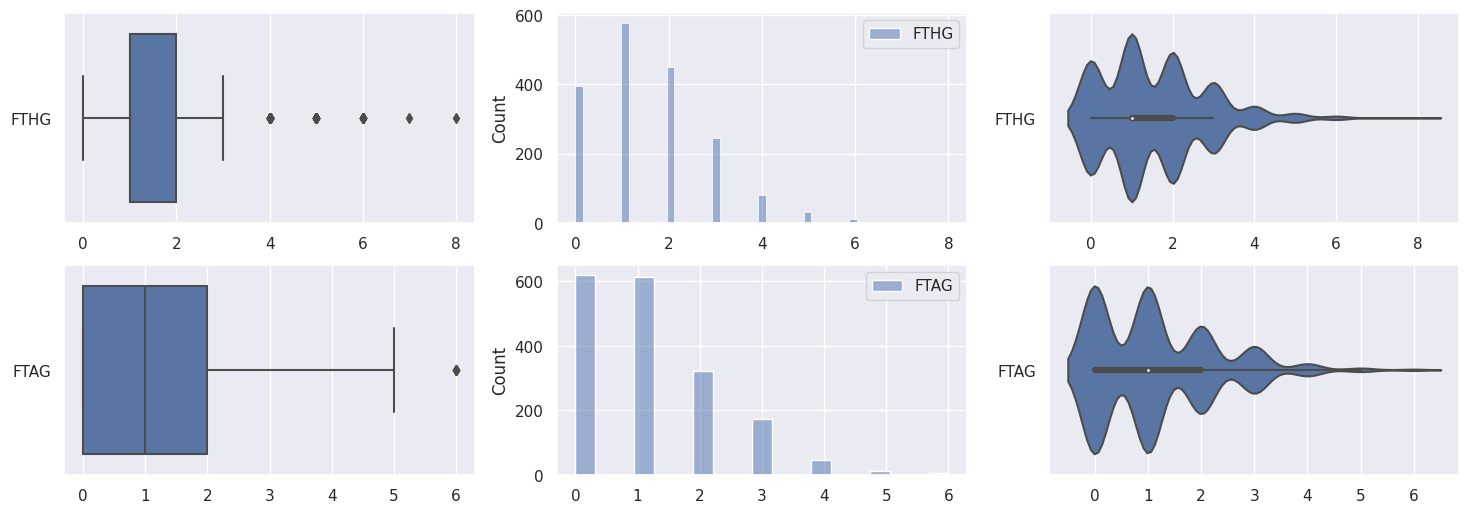

In [ ]:
# Draw the distribution of Response
f, axes = plt.subplots(2, 3, figsize=(18, 6))
sb.boxplot(data = y_train, orient = "h", ax = axes[0][0])
sb.histplot(data = y_train, ax = axes[0][1])
sb.violinplot(data = y_train, orient = "h", ax = axes[0][2])
sb.boxplot(data = y_train2, orient = "h", ax = axes[1][0])
sb.histplot(data = y_train2, ax = axes[1][1])
sb.violinplot(data = y_train2, orient = "h", ax = axes[1][2])

The top three figures are the distribution for predicting goals scored while the bottom threee figures are the distribution for predicting goals conceded.

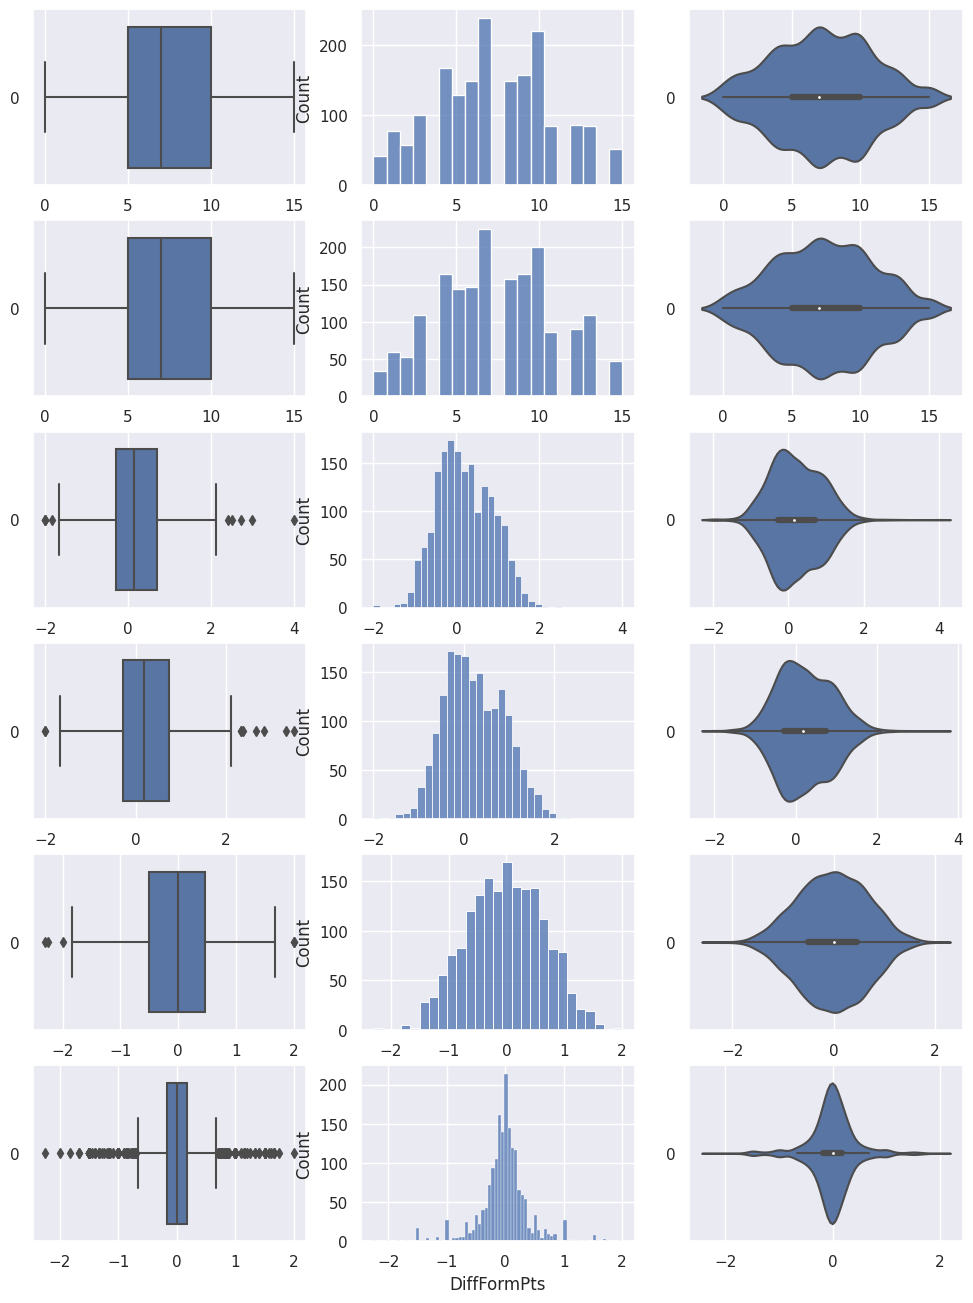

In [ ]:
# Draw the distributions of all Predictors (for predicting FTHG)
f, axes = plt.subplots(6, 3, figsize=(12, 16))

count = 0
for var in x_train:
    sb.boxplot(data = x_train[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = x_train[var], ax = axes[count,1])
    sb.violinplot(data = x_train[var], orient = "h", ax = axes[count,2])
    count += 1

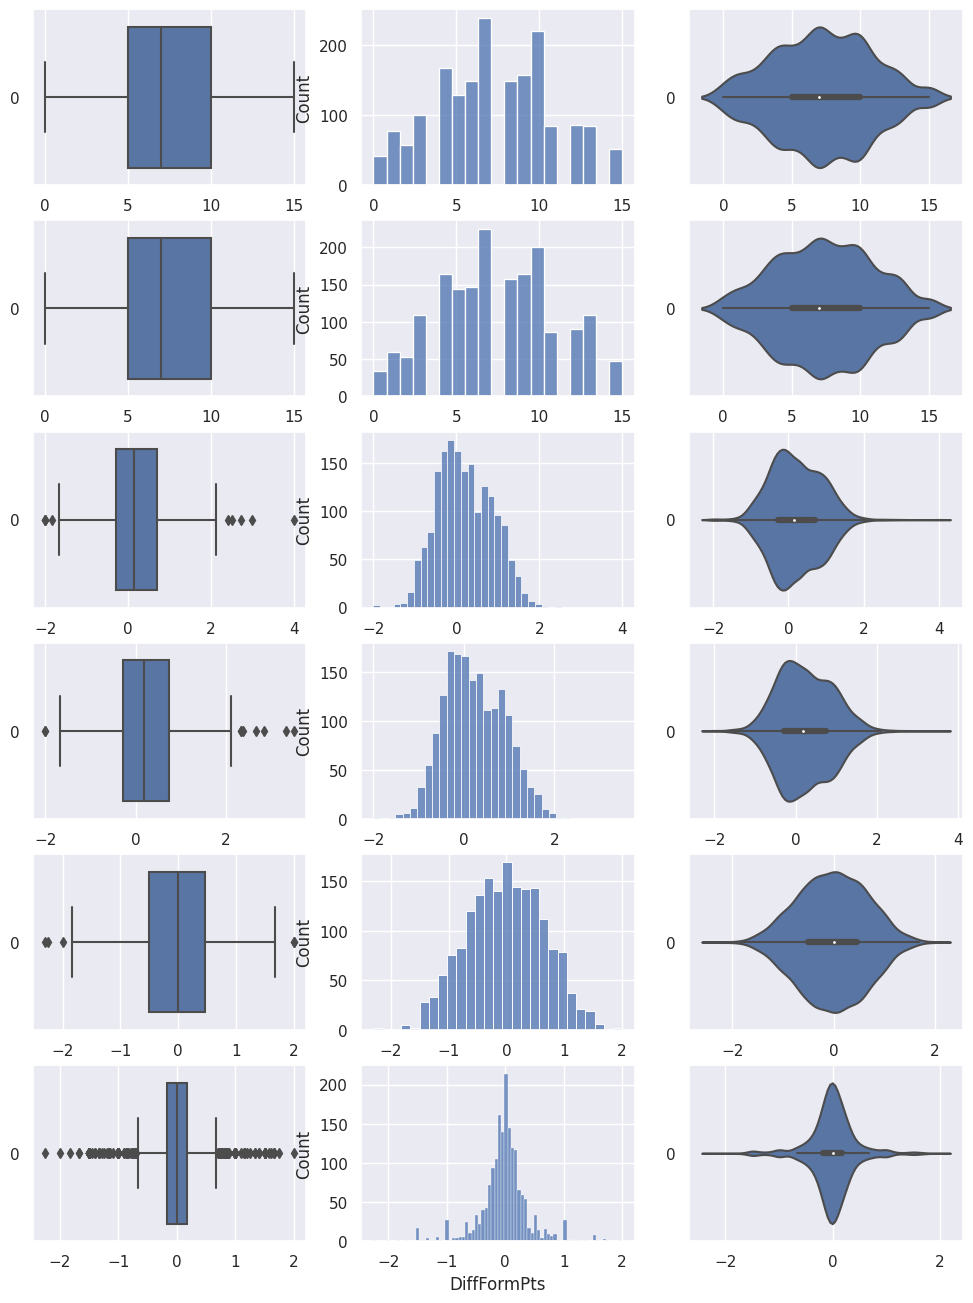

In [ ]:
# Draw the distributions of all Predictors (for predicting ATHG)
f, axes = plt.subplots(6, 3, figsize=(12, 16))

count = 0
for var in x_train2:
    sb.boxplot(data = x_train2[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = x_train2[var], ax = axes[count,1])
    sb.violinplot(data = x_train2[var], orient = "h", ax = axes[count,2])
    count += 1

<Axes: >

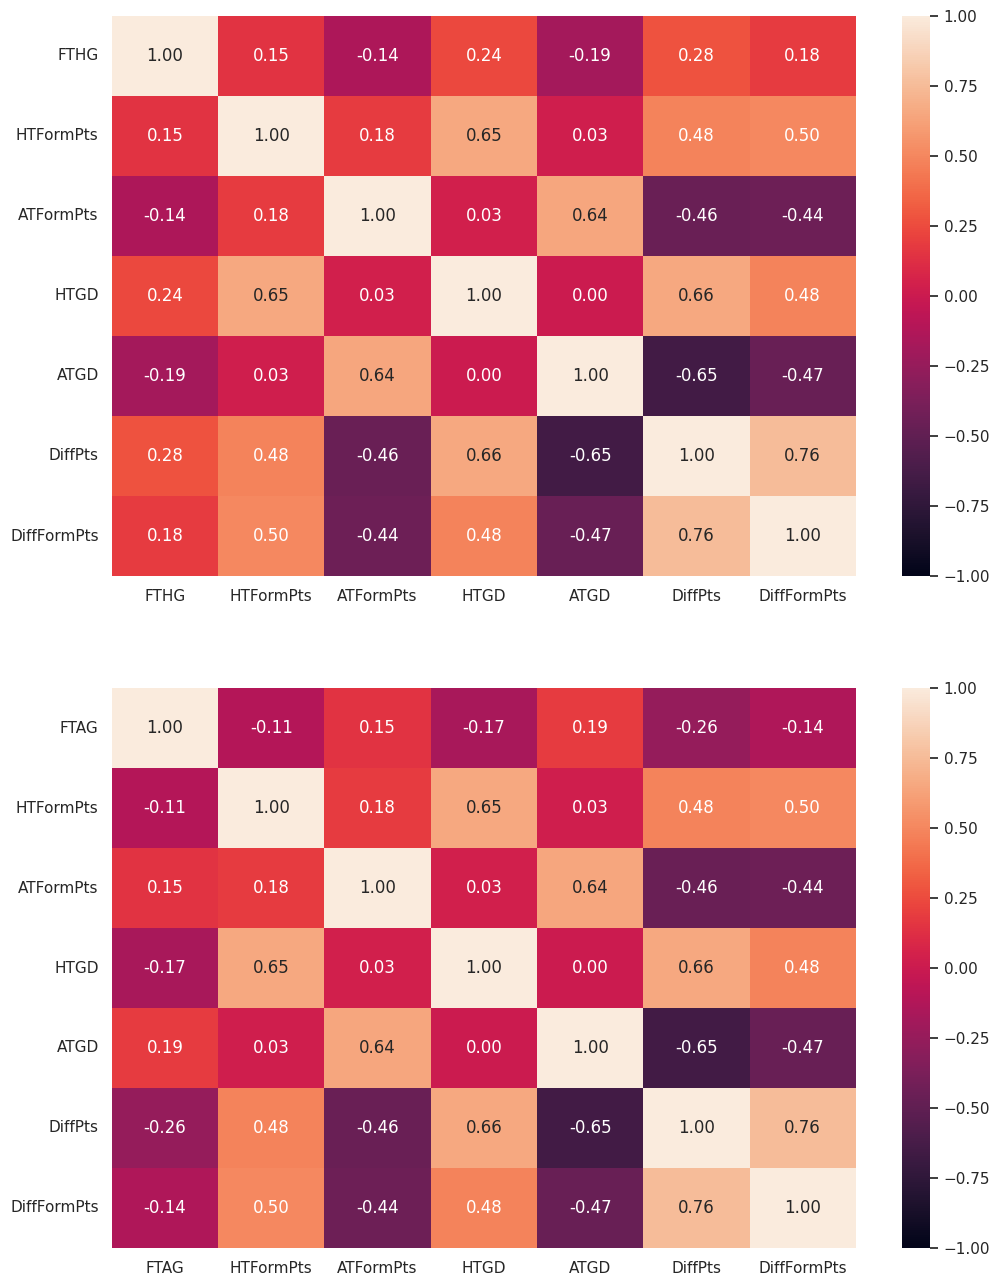

In [ ]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, x_train], axis = 1).reindex(y_train.index)
trainDF2 = pd.concat([y_train2, x_train2], axis = 1).reindex(y_train2.index)

f, axes = plt.subplots(2, 1, figsize=(12, 16))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", ax=axes[0])
sb.heatmap(trainDF2.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", ax=axes[1])

From the heatmap, we can check the relationship between FTHG/FTAG and the 6 indicators. 

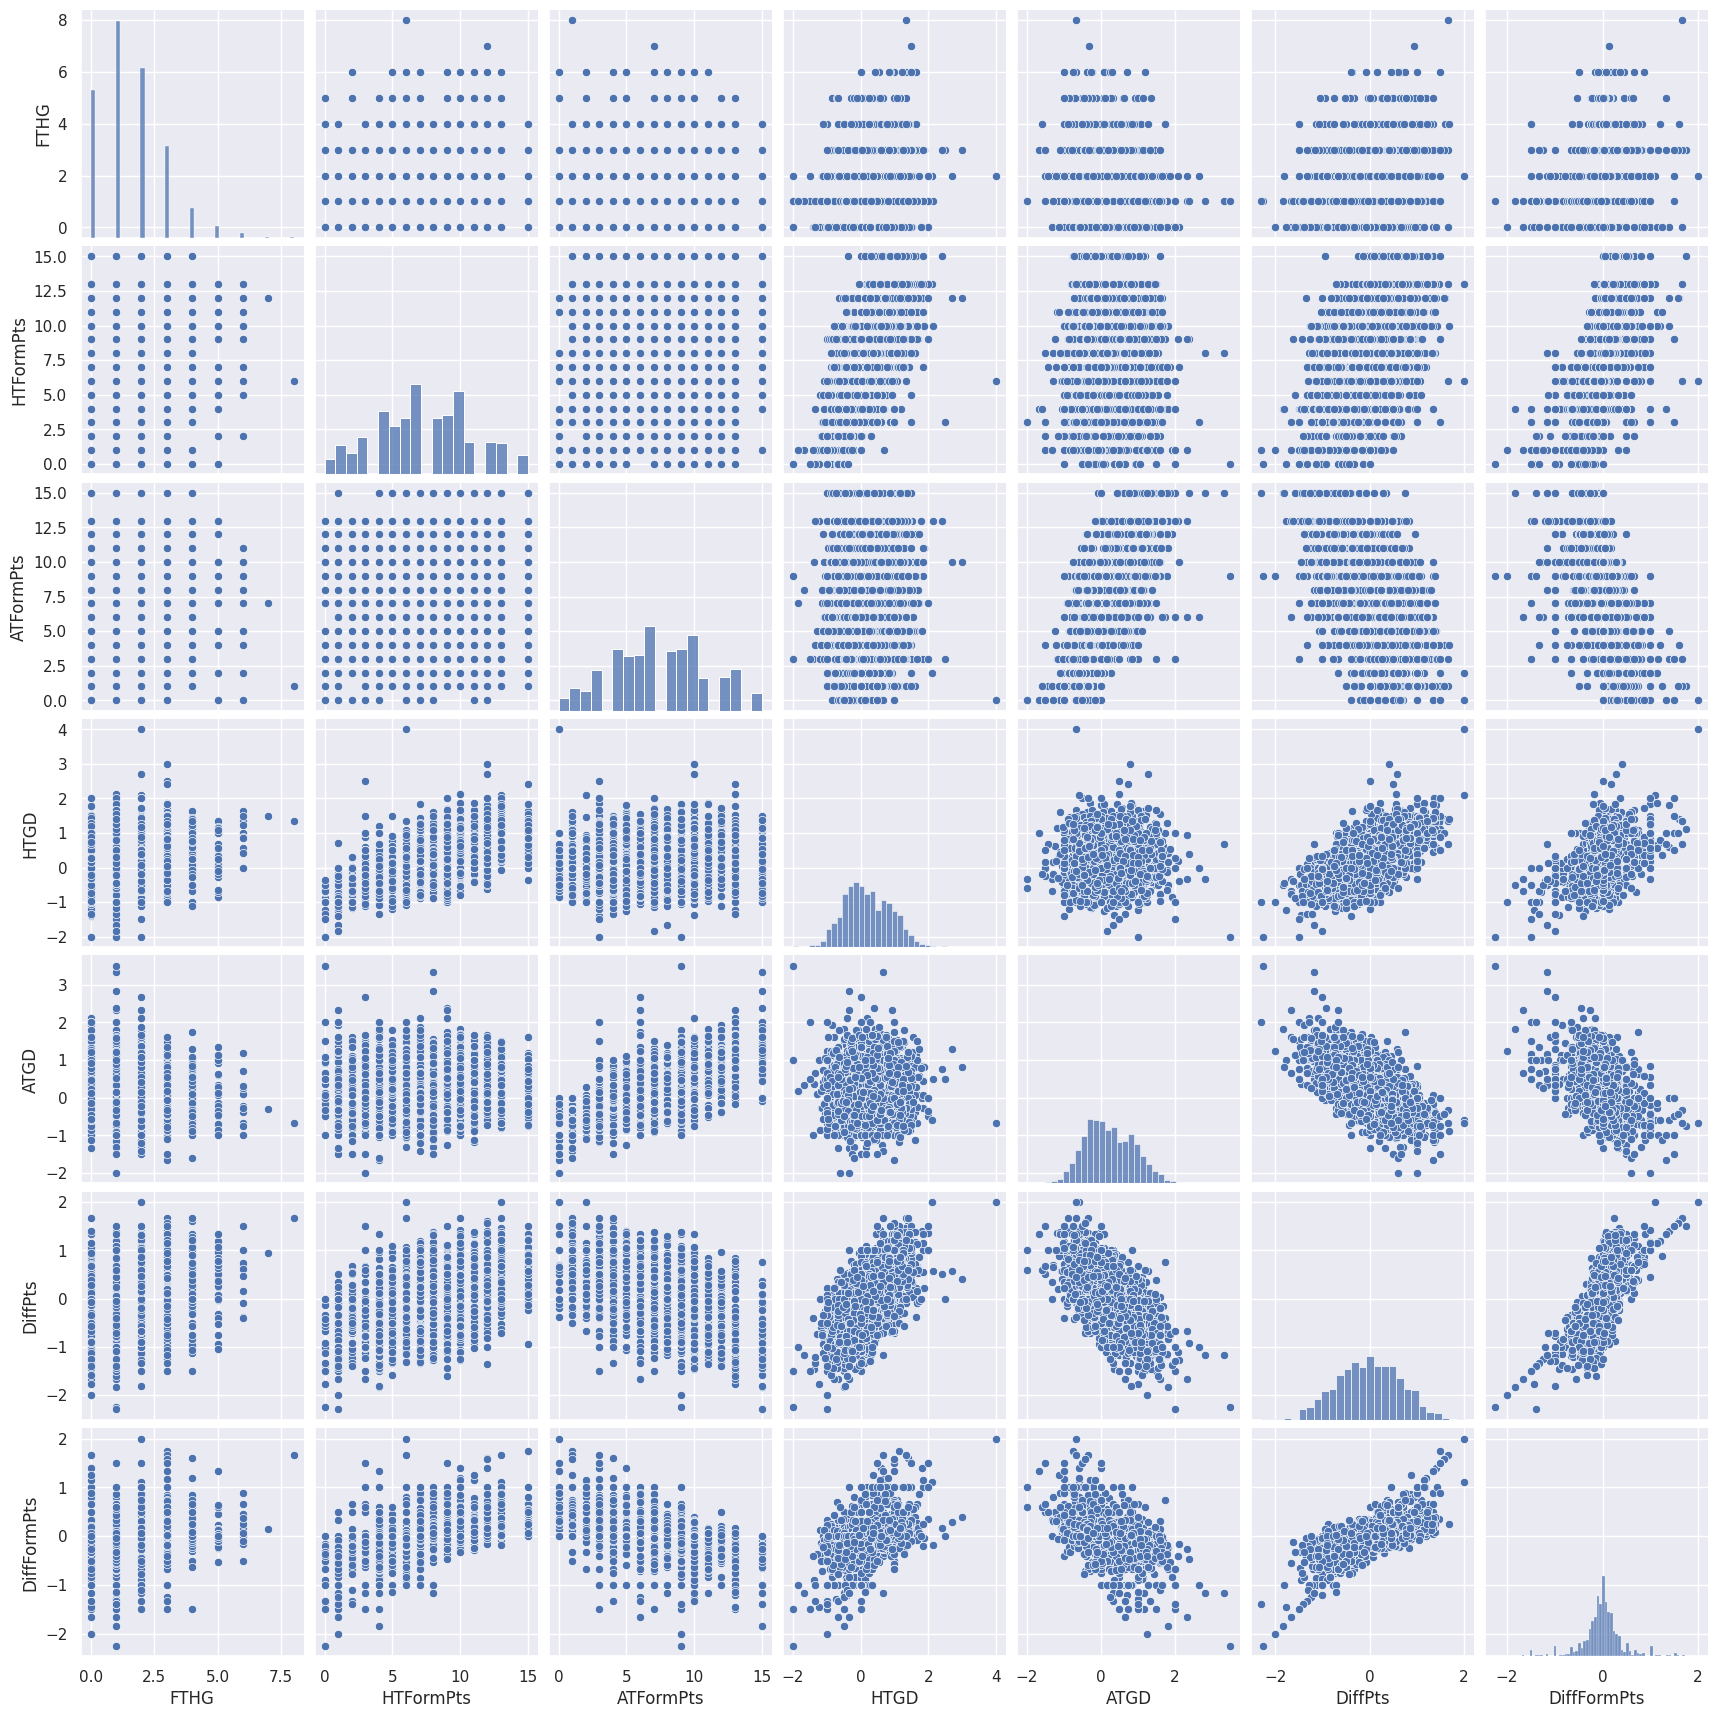

In [ ]:
# Relationship between Response and the Predictors
sb.pairplot(data = trainDF)

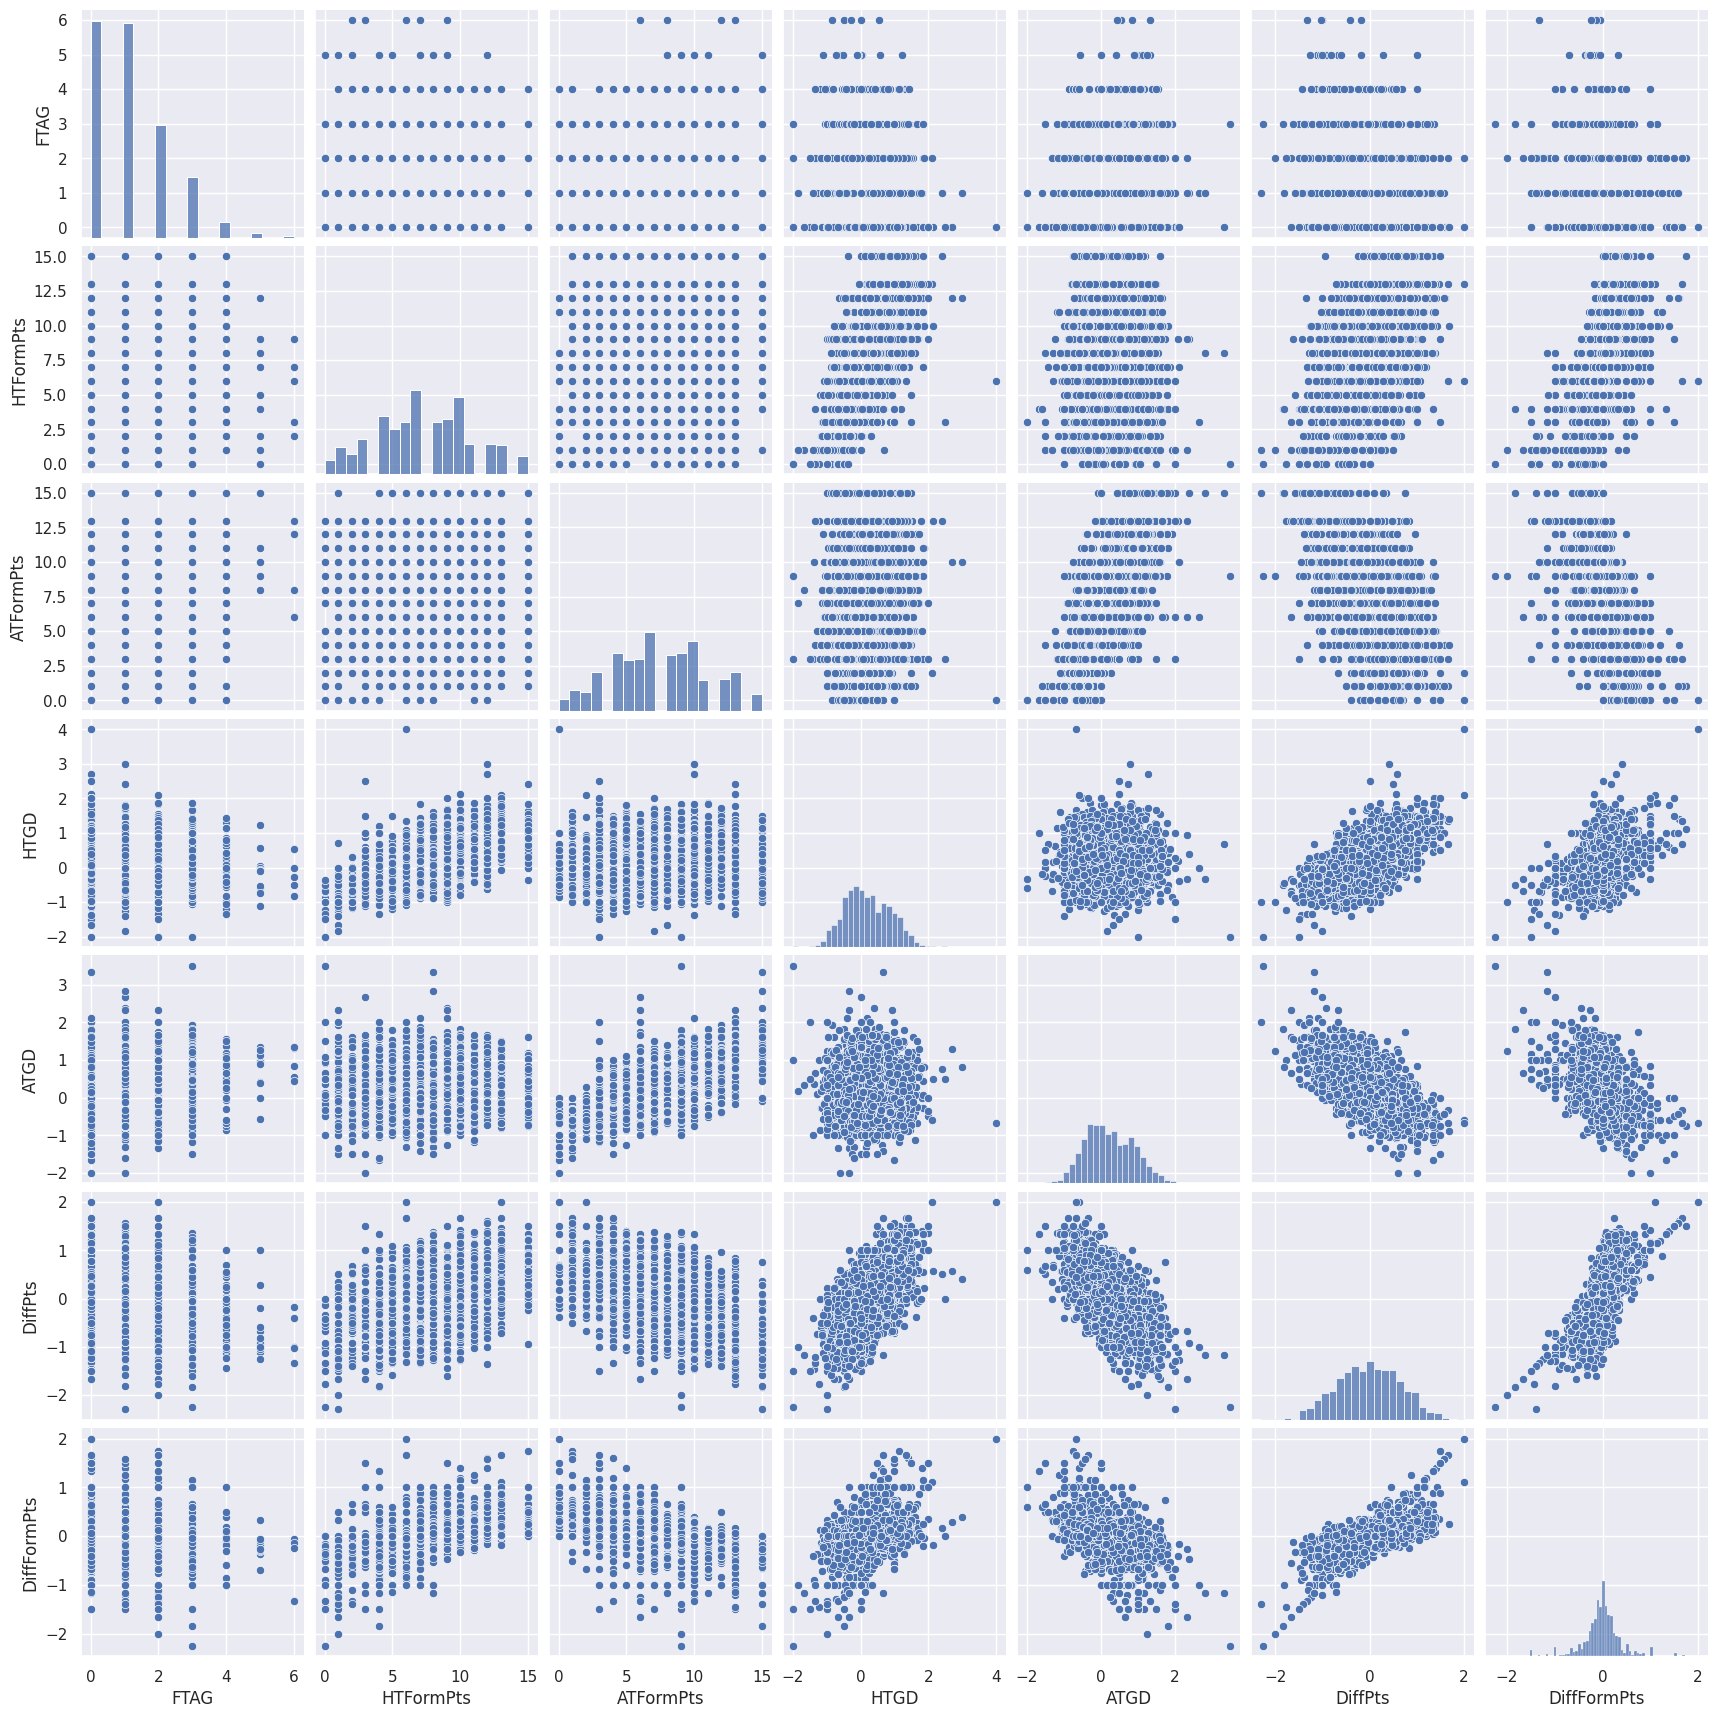

In [ ]:
# Relationship between Response and the Predictors
sb.pairplot(data = trainDF2)

From the pairplot, we can visualize the relationship between FTHG/FTAG and the 6 indicators.

### Train for Goal Scored

In [ ]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(x_train, y_train)        # train the linear regression model for goal scored

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [1.63932945]
Coefficients of Regression 	: a =  [[ 0.01376414 -0.02923321  0.4422586  -0.28627893  0.05426486 -0.23607882]]



,Predictors,Coefficients
0,HTFormPts,0.013764
1,ATFormPts,-0.029233
2,HTGD,0.442259
3,ATGD,-0.286279
4,DiffPts,0.054265
5,DiffFormPts,-0.236079


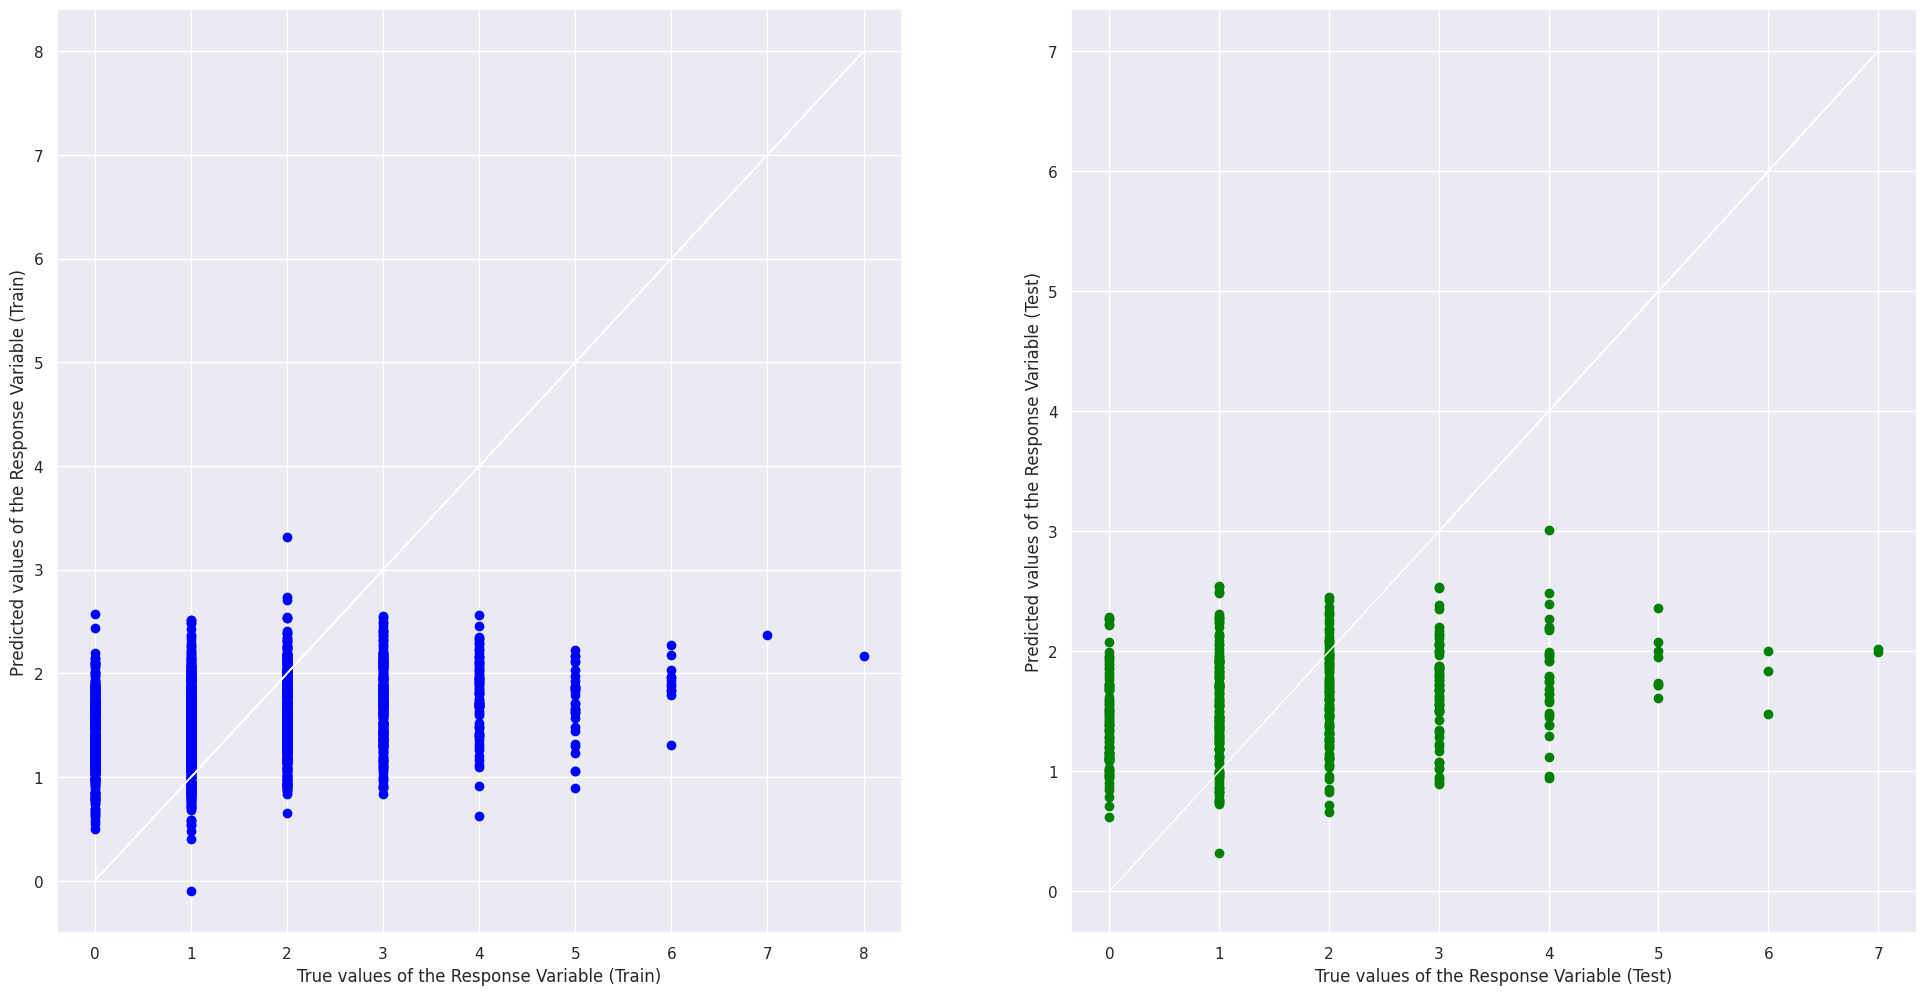

In [ ]:
# Predict the Total values from Predictors
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
# Extract Predictors for Prediction
predictors = ["HTFormPts","ATFormPts","HTGD","ATGD","DiffPts","DiffFormPts"]
x_pred = pd.DataFrame(data20172018[predictors])

# Predict Response corresponding to Predictors
y_pred = linreg.predict(x_pred)

# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns = ["Predicted_FTHG"], index = data20172018.index)
table_comparing_FTHG = pd.concat([data20172018[["HomeTeam", "AwayTeam","FTHG"]], y_pred], axis = 1)

y_errs = 100 * abs(table_comparing_FTHG["FTHG"] - table_comparing_FTHG["Predicted_FTHG"]) / table_comparing_FTHG["FTHG"]
y_errs = pd.DataFrame(y_errs, columns = ["Error"], index = data20172018.index)
table_for_comparing_FTHG = pd.concat([table_comparing_FTHG, y_errs], axis = 1)

table_comparing_FTHG

,HomeTeam,AwayTeam,FTHG,Predicted_FTHG
0,Bournemouth,Watford,0,1.479874
1,Burnley,West Brom,0,1.670912
2,Liverpool,Crystal Palace,1,1.991605
3,Southampton,West Ham,3,2.134744
4,Stoke,Arsenal,1,1.460082
...,...,...,...,...
293,Newcastle,Chelsea,3,0.989873
294,Southampton,Man City,0,0.516248
295,Swansea,Stoke,1,1.524011
296,Tottenham,Leicester,5,2.091886


### Train for Goal Conceded

In [ ]:
linreg.fit(x_train2, y_train2)        # train the linear regression model for goal conceded

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(x_train2.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [1.066159]
Coefficients of Regression 	: a =  [[-0.01784846  0.02771346 -0.10884816  0.09874094 -0.38897124  0.42600688]]



,Predictors,Coefficients
0,HTFormPts,-0.017848
1,ATFormPts,0.027713
2,HTGD,-0.108848
3,ATGD,0.098741
4,DiffPts,-0.388971
5,DiffFormPts,0.426007


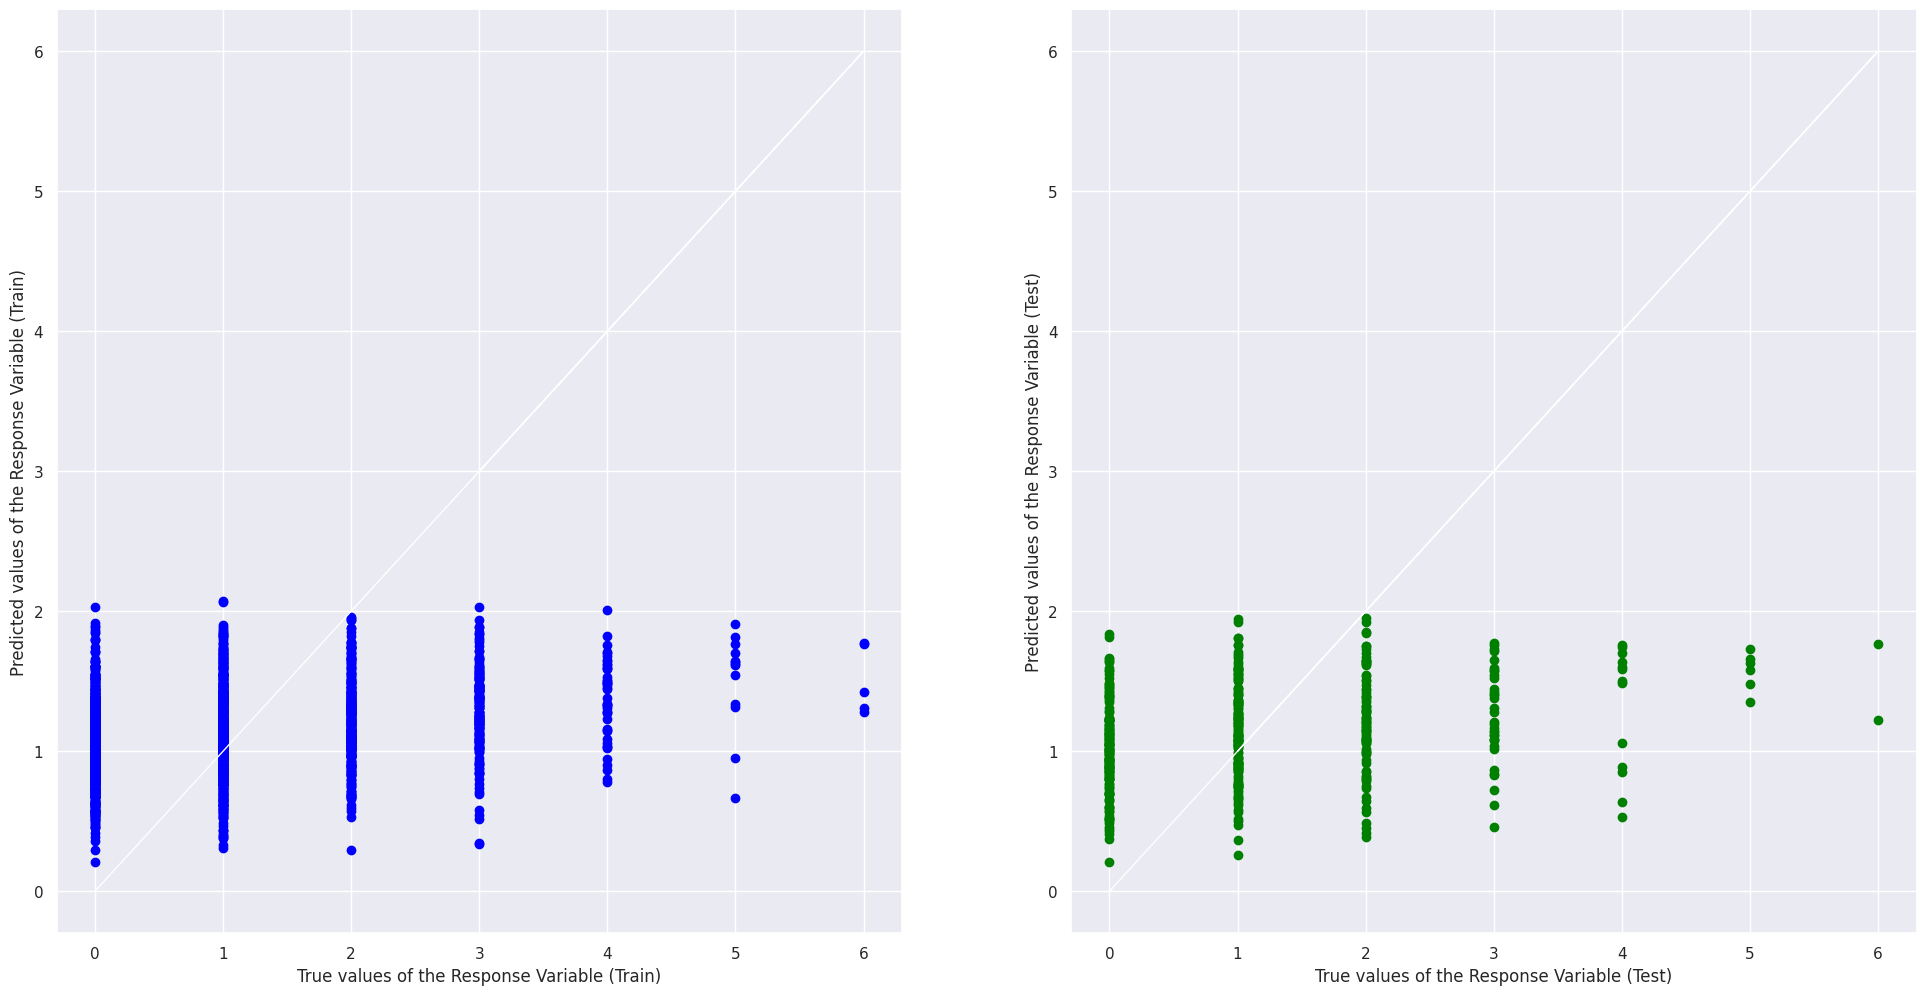

In [ ]:
# Predict the Total values from Predictors
y_train_pred2 = linreg.predict(x_train2)
y_test_pred2 = linreg.predict(x_test2)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train2, y_train_pred2, color = "blue")
axes[0].plot(y_train2, y_train2, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test2, y_test_pred2, color = "green")
axes[1].plot(y_test2, y_test2, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
# Extract Predictors for Prediction
X_pred2 = pd.DataFrame(data20172018[predictors])

# Predict Response corresponding to Predictors
y_pred2 = linreg.predict(X_pred2)

# Summarize the Actuals, Predictions and Errors
y_pred2 = pd.DataFrame(y_pred2, columns = ["Predicted_FTAG"], index = data20172018.index)
table_comparing_FTAG = pd.concat([data20172018[["HomeTeam","AwayTeam","FTAG"]], y_pred2], axis = 1)

y_errs2 = 100 * abs(table_comparing_FTAG["FTAG"] - table_comparing_FTAG["Predicted_FTAG"]) / table_comparing_FTAG["FTAG"]
y_errs2 = pd.DataFrame(y_errs2, columns = ["Error"], index = data20172018.index)
table_comparing_FTAG = pd.concat([table_comparing_FTAG, y_errs2], axis = 1)

table_comparing_FTAG

,HomeTeam,AwayTeam,FTAG,Predicted_FTAG,Error
0,Bournemouth,Watford,2,1.129779,43.511064
1,Burnley,West Brom,1,1.090700,9.070037
2,Liverpool,Crystal Palace,0,0.918717,inf
3,Southampton,West Ham,2,0.869346,56.532677
4,Stoke,Arsenal,0,1.197540,inf
...,...,...,...,...,...
293,Newcastle,Chelsea,0,1.659295,inf
294,Southampton,Man City,1,2.106232,110.623231
295,Swansea,Stoke,2,1.067314,46.634322
296,Tottenham,Leicester,4,0.695552,82.611192


In [ ]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset - FTHG")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset - FTHG")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset2 - ATHG")
print("Explained Variance (R^2) \t:", linreg.score(x_train2, y_train2))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train2, y_train_pred2))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset2 - ATHG")
print("Explained Variance (R^2) \t:", linreg.score(x_test2, y_test2))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test2, y_test_pred2))
print()

Goodness of Fit of Model 	Train Dataset - FTHG
Explained Variance (R^2) 	: -0.31014677098984333
Mean Squared Error (MSE) 	: 1.4542988115198259

Goodness of Fit of Model 	Test Dataset - FTHG
Explained Variance (R^2) 	: -0.3664263551367437
Mean Squared Error (MSE) 	: 1.700451074700963

Goodness of Fit of Model 	Train Dataset2 - ATHG
Explained Variance (R^2) 	: 0.07701160096584758
Mean Squared Error (MSE) 	: 1.202659059839555

Goodness of Fit of Model 	Test Dataset2 - ATHG
Explained Variance (R^2) 	: 0.08242478450964363
Mean Squared Error (MSE) 	: 1.2925184383755606



In [ ]:
table_prediction_vs_actual = pd.concat([data20172018[["HomeTeam","AwayTeam","FTHG","FTAG"]], y_pred, y_pred2], axis = 1)
table_prediction_vs_actual

,HomeTeam,AwayTeam,FTHG,FTAG,Predicted_FTHG,Predicted_FTAG
0,Bournemouth,Watford,0,2,1.479874,1.129779
1,Burnley,West Brom,0,1,1.670912,1.090700
2,Liverpool,Crystal Palace,1,0,1.991605,0.918717
3,Southampton,West Ham,3,2,2.134744,0.869346
4,Stoke,Arsenal,1,0,1.460082,1.197540
...,...,...,...,...,...,...
293,Newcastle,Chelsea,3,0,0.989873,1.659295
294,Southampton,Man City,0,1,0.516248,2.106232
295,Swansea,Stoke,1,2,1.524011,1.067314
296,Tottenham,Leicester,5,4,2.091886,0.695552


In [ ]:
#Computing Original Point Table for 2017-2018
factors = ["Teams", "Matches", "Pts", "GoalDiff"]

#Array for variables to be created
matches = [0]*18
goal_diff = [0]*18
pts = [0]*18
goal_diff_predict = [0]*18
pts_predict = [0]*18

#Combining all the arrays into one for inserting into table
variables = [team, matches, pts, goal_diff]
variables_predict = [team, matches, pts_predict, goal_diff_predict]

#Creating premier league original and predicted tables for one particular season
pl_original= pd.DataFrame(data=None,columns=factors[:])
pl_predict = pd.DataFrame(data=None,columns=factors[:])

#Running a loop for each team
for i in range(len(team)):
  #initialising all variables to zero
  games=away_goals=goal=pt=pt_pred=goal_pred=away_goal_pred=0

  #Running a loop to make the team traverse through the table created above which contains predicted scores and actual scores for each match in that season
  for j in range(len(table_prediction_vs_actual)):

    #Count the number of games played by each team
    if((table_prediction_vs_actual["HomeTeam"][j] == team[i]) or (table_prediction_vs_actual["AwayTeam"][j] == team[i])):
      games+=1

    #Considering cases for team playing home team matches
    if(table_prediction_vs_actual["HomeTeam"][j] == team[i]):
      goal+=table_prediction_vs_actual["FTHG"][j]
      goal_pred+=table_prediction_vs_actual["Predicted_FTHG"][j]
      away_goals+=table_prediction_vs_actual["FTAG"][j]
      away_goal_pred+=table_prediction_vs_actual["Predicted_FTAG"][j]

      #Adding pts for winning matches (actual)
      if(table_prediction_vs_actual["FTHG"][j] > table_prediction_vs_actual["FTAG"][j]):
        pt+=3

      #Adding pts for draw matches (actual)
      elif(table_prediction_vs_actual["FTHG"][j] == table_prediction_vs_actual["FTAG"][j]):
        pt+=1

      #Adding pts for winning matches (predicted)
      if(table_prediction_vs_actual["Predicted_FTHG"][j] > table_prediction_vs_actual["Predicted_FTAG"][j]):
        pt_pred+=3

      #Adding pts for draw matches (predicted)
      elif(table_prediction_vs_actual["Predicted_FTHG"][j] == table_prediction_vs_actual["Predicted_FTAG"][j]):
        pt_pred+=1

    #Considering cases for team playing away team matches
    elif(table_prediction_vs_actual["AwayTeam"][j] == team[i]):
      goal+=table_prediction_vs_actual["FTAG"][j]
      goal_pred+=table_prediction_vs_actual["Predicted_FTAG"][j]
      away_goals+=table_prediction_vs_actual["FTHG"][j]
      away_goal_pred+=table_prediction_vs_actual["Predicted_FTHG"][j]

      #Adding pts for winning matches (actual)
      if(table_prediction_vs_actual["FTHG"][j] < table_prediction_vs_actual["FTAG"][j]):
        pt+=3

      #Adding pts for draw matches (actual)
      elif(table_prediction_vs_actual["FTHG"][j] == table_prediction_vs_actual["FTAG"][j]):
        pt+=1

      #Adding pts for winning matches (predicted)
      if(table_prediction_vs_actual["Predicted_FTHG"][j] < table_prediction_vs_actual["Predicted_FTAG"][j]):
        pt_pred+=3

      #Adding pts for draw matches (predicted)
      elif(table_prediction_vs_actual["Predicted_FTHG"][j] == table_prediction_vs_actual["Predicted_FTAG"][j]):
        pt_pred+=1

  #Updating the calculated values into the arrays for each team
  matches[i] = games
  if(games != 0):
    pts[i] = pt
    pts_predict[i] = pt_pred
    goal_diff[i] = goal - away_goals
    goal_diff_predict[i] = goal_pred - away_goal_pred

#Inserting arrays into premier league original and predicted tables for one particular season
for k in range(len(variables)):
  pl_original[factors[k]] =  variables[k]
  pl_predict[factors[k]] = variables_predict[k]

#Sorting the table according to pts and if pts are same according to goal differences like how orginal premier league table looks  
pl_original = pl_original.sort_values(by=['Pts','GoalDiff'], ascending=False)
pl_predict = pl_predict.sort_values(by=['Pts','GoalDiff'], ascending=False)
pl_original = pl_original.reset_index()
pl_predict = pl_predict.reset_index()
pl_original.drop(pl_original.columns[pl_original.columns.str.contains('index',case = False)],axis = 1, inplace = True)
pl_predict.drop(pl_predict.columns[pl_predict.columns.str.contains('index',case = False)],axis = 1, inplace = True)


In [ ]:
#Actual data from what actually happened 2017-2018
pl_original

,Teams,Matches,Pts,GoalDiff
0,Man City,34,90,74
1,Man United,33,72,35
2,Tottenham,33,64,28
3,Liverpool,33,62,32
4,Chelsea,33,60,17
5,Arsenal,33,51,15
6,Burnley,33,47,-4
7,Newcastle,33,40,-5
8,Watford,33,39,-15
9,Crystal Palace,34,37,-10


In [ ]:
#Predicted data using linear regression model
pl_predict

,Teams,Matches,Pts,GoalDiff
0,Man City,34,96,51.926885
1,Man United,33,93,31.323084
2,Tottenham,33,78,23.120229
3,Liverpool,33,72,20.659599
4,Chelsea,33,69,18.675258
5,Burnley,33,66,3.439571
6,Arsenal,33,63,8.883256
7,Leicester,33,51,-3.125808
8,Watford,33,45,-6.648194
9,Everton,33,39,-10.232453


In [ ]:
#To display actual and predicted premier league tables side by side for comparison
df1_styler = pl_original.style.set_table_attributes("style='display:inline'").set_caption('Original Data')
df2_styler = pl_predict.style.set_table_attributes("style='display:inline'").set_caption('Predicted Data')
df2_t_styler = pl_predict.T.style.set_table_attributes("style='display:inline'").set_caption('df2_t')
space = "\xa0" * 10

display_html(df1_styler._repr_html_()+space+df2_styler._repr_html_(), raw=True)

,Teams,Matches,Pts,GoalDiff
0,Man City,34,90,74
1,Man United,33,72,35
2,Tottenham,33,64,28
3,Liverpool,33,62,32
4,Chelsea,33,60,17
5,Arsenal,33,51,15
6,Burnley,33,47,-4
7,Newcastle,33,40,-5
8,Watford,33,39,-15
9,Crystal Palace,34,37,-10


In [ ]:
#Comparing the deviation between the actual and predicted
print("Deviation between actual and predicted data for EPL season 2017-2018")
pl_predict_array = np.array(pl_predict)
pl_test_array = np.array(pl_original)

# extract points columns as float arrays
pts_test = pl_test_array[:, 2].astype(float)
pts_predict = pl_predict_array[:, 2].astype(float)

# compute point differences
diff = pts_test - pts_predict

diff_pts = np.array(diff)

# Calculate the mean squared error (MSE)
mse = np.mean(np.square(diff_pts))
print("MSE:", mse)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

Deviation between actual and predicted data for EPL season 2017-2018
MSE: 98.05555555555556
RMSE: 9.902300518341965


## **Neural Network Model**

In [ ]:
#reference https://www.kaggle.com/code/jeongwonwoobit/epl-winner

#To start the neural network, let us try to simulate two teams versusing each other first. This is to see how Neural Network Model work before simulating every team against each other.
#We pick Man City and Man United as an example.
#We try to use the data from datasettesttrain to simulate how they would perform in data20172018

#Initializing data
nndata = pd.DataFrame(datasettesttrain)
nntest = pd.DataFrame(data20172018)
home = "Arsenal"
away = "West Ham"
print("Home : Away = " + home + " : " + away)

#Taking out the required data
preResult = pd.concat([nndata[nndata['HomeTeam']==home], nndata[nndata['AwayTeam']==home]]).sort_index()
newresult = pd.concat([preResult[preResult['AwayTeam']==away]]).sort_index()
newresult

Home : Away = Arsenal : West Ham


,index,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,Year,Month
75,75,03/03/01,Arsenal,West Ham,3,0,H,43,35,23,...,0,0,0,0,0.714286,0.107143,0.535714,0.178571,1,3
189,189,24/04/02,Arsenal,West Ham,2,0,H,72,45,33,...,1,0,0,0,1.083333,-0.166667,0.777778,0.055556,2,4
263,263,19/01/2003,Arsenal,West Ham,3,1,H,49,24,24,...,0,0,0,0,1.041667,-0.791667,1.333333,0.375000,3,1
547,547,01/02/06,Arsenal,West Ham,2,3,NH,34,29,16,...,0,0,0,0,0.782609,-0.086957,0.347826,0.173913,6,2
654,654,07/04/07,Arsenal,West Ham,0,1,NH,52,25,29,...,0,0,1,0,0.718750,-0.812500,0.906250,0.000000,7,4
705,705,01/01/08,Arsenal,West Ham,2,0,H,36,25,15,...,0,0,0,0,1.050000,0.400000,0.750000,-0.100000,8,1
807,807,31/01/09,Arsenal,West Ham,0,0,NH,37,29,24,...,0,0,0,0,0.565217,-0.086957,0.521739,0.043478,9,1
916,916,20/03/10,Arsenal,West Ham,2,0,H,69,37,32,...,0,0,0,0,1.233333,-0.400000,1.133333,0.200000,10,3
961,961,30/10/10,Arsenal,West Ham,1,0,H,21,7,10,...,0,0,0,0,1.100000,-1.000000,1.100000,0.100000,10,10
1236,1236,23/01/13,Arsenal,West Ham,5,1,H,41,25,26,...,0,0,0,0,0.652174,-0.130435,0.304348,0.130435,13,1


In [ ]:
#We use a new dataframe to add new columns. If HomeTeam wins, set FTR as 0. If AwayTeam wins, set FTR as 2. If they draw, set FTR=1
#The number set as FTR is arbitrary and represent a state system that the neural network is trying to predict
newnewresult = pd.DataFrame(newresult)
newnewresult.loc[(newresult.FTHG > newresult.FTAG),'FTR']=0 #HomeWin=0
newnewresult.loc[(newresult.FTAG > newresult.FTHG),'FTR']=2 #AwayWin=2
newnewresult.loc[(newresult.FTHG == newresult.FTAG),'FTR']=1 #Draw=1


x_datanew = newnewresult.iloc[:,[4,5,26,27,36,37,38,39]] #x_datanew is the predictor, which are FTHG, FTAG, HTFormPts, ATFormPts, HTGD, ATGD, DiffPts, DiffFormPts
y_datanew = newnewresult.iloc[:,6] #y_datanew is the predicted value, which is FTR (W/L/D)
y_oneHot = tf.keras.utils.to_categorical(y_datanew,3) #converts numerical (W/L/D) to categorical, represented as vectors with three elements
tf.model = tf.keras.Sequential() #TensorFlow Keras API
tf.model.add(tf.keras.layers.Dense(units=3,input_dim=x_datanew.shape[1],activation='softmax')) #Add a layer with 3 output units and input according to x_datanew
tf.model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(lr=0.1),metrics=['accuracy'])
tf.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 27        
                                                                 
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#This is the training for the two teams according to neural network model!
history = tf.model.fit(x_datanew,y_oneHot,epochs=500) #epochs means trained 500 times
print("Accuracy for",home, "vs",away,": ",history.history['accuracy'][-1])

Epoch 1/500
1/1 [==============================] - 1s 501ms/step - loss: 2.8529 - accuracy: 0.0769
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 1.9172 - accuracy: 0.1538
Epoch 3/500
1/1 [==============================] - 0s 15ms/step - loss: 1.4672 - accuracy: 0.3846
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 1.3170 - accuracy: 0.4615
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 1.2576 - accuracy: 0.5385
Epoch 6/500
1/1 [==============================] - 0s 11ms/step - loss: 1.2269 - accuracy: 0.5385
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 1.2077 - accuracy: 0.5385
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 1.1938 - accuracy: 0.6154
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 1.1826 - accuracy: 0.6154
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 1.1729 - accuracy: 0.6154
Epoch 11/500
1/1 [===

In [ ]:
#The function is made to return the highest integer from a list filled with 3 integers
def takehighestone(numar):
    if numar[0][0] > numar[0][1] and numar[0][0] > numar[0][2]:
        return (0,numar[0][0])
    elif numar[0][1] > numar[0][0] and numar[0][1] > numar[0][2]:
        return (1,numar[0][1])
    elif numar[0][2] > numar[0][0] and numar[0][2] > numar[0][1]:
        return (2,numar[0][2])

In [ ]:
#Taking out the Man City vs Man United from EPL season 2017-2018
#This data is used to input the 8 variables used and see if they can predict who wins between Man City vs Man United
testingnn = pd.concat([data20172018[data20172018['HomeTeam']==home], data20172018[data20172018['AwayTeam']==home]]).sort_index()
nnresult = pd.concat([testingnn[testingnn['AwayTeam']==away]]).sort_index()
nnresult

,index,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,Year,Month
266,2507,22/04/18,Arsenal,West Ham,4,1,H,66,42,46,...,0,0,0,0,0.571429,-0.6,0.628571,0.2,18,4


In [ ]:
#Taking out all the 8 independent variables used in the neural network
test_hg = int(nnresult["FTHG"])
test_ag = int(nnresult["FTAG"])
test_diffpts = float(nnresult["DiffPts"])
test_diffformpts = float(nnresult["DiffFormPts"])
test_HTGD = float(nnresult["HTGD"])
test_ATGD = float(nnresult["ATGD"])
test_HTFormPts = float(nnresult["HTFormPts"])
test_ATFormPts = float(nnresult["ATFormPts"])

#Put the 8 variables into an array called test_data
test_data = np.array([[test_hg,test_ag,test_HTFormPts,test_ATFormPts,test_HTGD, test_ATGD,test_diffpts,test_diffformpts]])

#Print out the prediction of Win/Lose/Draw according to the given variables
print("The probability distribution of HomeWin, AwayWin, Draw:",tf.model.predict(test_data))
print("Predicted outcome:",tf.model.predict(test_data)>0.5)

#Based on the result above, it will print out 3 values in a list [[a b c]]. 
#(Note: If HomeTeam wins, set FTR as 0. If AwayTeam wins, set FTR as 2. If they draw, set FTR=1)
#Following the declaration in the FTR, the a,b,c will indicate the probability distribution of [[HomeTeamWin TheyDraw AwayTeamWin]]
#Print out the result for the predicted result below:
numar=tf.model.predict(test_data)
nnpredictedresult = takehighestone(numar)
print("Predicted Result:")
if(nnpredictedresult[0]==0):
    print("Home Team",home, "wins, certainty: ",nnpredictedresult[1])
elif(nnpredictedresult[0]==1):
    print("Both teams draw, certainty: ",nnpredictedresult[1])
elif(nnpredictedresult[0]==2):
    print("Away Team",away, "wins, certainty: ",nnpredictedresult[1])

print("Actual Result:")
if(test_hg>test_ag):
  print("Home Team",home, "wins")
elif(test_ag>test_hg):
  print("Away Team",away, "wins")
else:
  print("Both teams draw")


1/1 [==============================] - 0s 68ms/step
The probability distribution of HomeWin, AwayWin, Draw: [[0.9683908  0.0037811  0.02782812]]
1/1 [==============================] - 0s 20ms/step
Predicted outcome: [[ True False False]]
1/1 [==============================] - 0s 21ms/step
Predicted Result:
Home Team Arsenal wins, certainty:  0.9683908
Actual Result:
Home Team Arsenal wins


As seen above, the neural network has made a prediction betwen two teams specifically, which is correct in this case. Since this method is shown to be working, we are going to implement the same method on all of the teams against each other. In the end, we are going to tabulate the final rankings of the team.

In [ ]:
#Using nndata for the predicition using neural network
#Adding PredictState and Certainty to indicate the predicted result in the DataFrame
nntest["PredictState"] = None
nntest["Certainty"] = 0
nntest.drop(nntest.columns[nntest.columns.str.contains('index',case = False)],axis = 1, inplace = True)
nntest = nntest.reset_index()

#Setting all the FTR to be the same as before
nndata.loc[(nndata.FTHG > nndata.FTAG),'FTR']=0 #HomeWin=0
nndata.loc[(nndata.FTAG > nndata.FTHG),'FTR']=2 #AwayWin=2
nndata.loc[(nndata.FTHG == nndata.FTAG),'FTR']=1 #Draw=1

In [ ]:
#We are using ther same method as the previous 1vs1 team but applying it as a function.
#This is so that we can run the the same method for each team against every team
#The method used is the same

def neuralnetwork(dfnn,dfnnresult):
    rowslength = nndata.shape[0]
    allteams = dfnn["HomeTeam"].unique()
    for i in allteams:
        for j in allteams:
            if(i==j):
                continue
            hometeam = i
            awayteam = j
            pretempresult = pd.concat([dfnn[dfnn['HomeTeam']==hometeam], dfnn[dfnn['AwayTeam']==hometeam]]).sort_index()
            tempresult = pd.concat([pretempresult[pretempresult['AwayTeam']==awayteam]]).sort_index()
            
            x_datann = tempresult.iloc[:,[4,5,26,27,36,37,38,39]] #predictor is FTHG, FTAG, diffpts, diffformpts
            y_datann = tempresult.iloc[:,6] #predicted is FTR, which is the W/L/D
            y_oneHotnn = tf.keras.utils.to_categorical(y_datann,3) #converts numerical to categorical, represented as vectors with three elements
            tf.model = tf.keras.Sequential() #TensorFlow Keras API
            tf.model.add(tf.keras.layers.Dense(units=3,input_dim=x_datann.shape[1],activation='softmax')) #Add a layer with 3 output units and input according to x_datanew
            tf.model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(lr=0.1),metrics=['accuracy'])
            history = tf.model.fit(x_datann,y_oneHotnn,epochs=500,verbose=0) #epochs means trained 500 times
            print("Accuracy for",hometeam, "vs",awayteam,": ",history.history['accuracy'][-1])

            testnn = pd.concat([dfnnresult[dfnnresult['HomeTeam']==hometeam], dfnnresult[dfnnresult['AwayTeam']==hometeam]]).sort_index()
            nnresult = pd.concat([testnn[testnn['AwayTeam']==awayteam]]).sort_index()

            if nnresult.empty:
              continue

            testing_hg = int(nnresult["FTHG"])
            testing_ag = int(nnresult["FTAG"])
            testing_diffpts = float(nnresult["DiffPts"])
            testing_diffformpts = float(nnresult["DiffFormPts"])
            testing_HTGD = float(nnresult["HTGD"])
            testing_ATGD = float(nnresult["ATGD"])
            testing_HTFormPts = float(nnresult["HTFormPts"])
            testing_ATFormPts = float(nnresult["ATFormPts"])
            testing_data = np.array([[testing_hg,testing_ag,testing_HTFormPts,testing_ATFormPts,testing_HTGD, testing_ATGD,testing_diffpts,testing_diffformpts]])
            
            numarr=tf.model.predict(testing_data)

            nnpredictresult = takehighestone(numarr)

            if(nnpredictresult[0]==0):
                #print("Home Team",home, "wins, certainty: ",nnpredictedresult[1])
                for team in range(len(dfnnresult)):
                    if(dfnnresult["HomeTeam"][team]==hometeam and dfnnresult["AwayTeam"][team]==awayteam):
                        dfnnresult["PredictState"][team]='W'
                        dfnnresult["Certainty"][team]=nnpredictresult[1]
                    if(dfnnresult["HomeTeam"][team]==awayteam and dfnnresult["AwayTeam"][team]==hometeam):
                        dfnnresult["PredictState"][team]='L'
                        dfnnresult["Certainty"][team]=nnpredictresult[1]
            elif(nnpredictresult[0]==1):
                #print("Both teams draw, certainty: ",nnpredictedresult[1])
                for team in range(len(dfnnresult)):
                    if(dfnnresult["HomeTeam"][team]==hometeam and dfnnresult["AwayTeam"][team]==awayteam):
                        dfnnresult["PredictState"][team]='D'
                        dfnnresult["Certainty"][team]=nnpredictresult[1]
                    if(dfnnresult["HomeTeam"][team]==awayteam and dfnnresult["AwayTeam"][team]==hometeam):
                        dfnnresult["PredictState"][team]='D'
                        dfnnresult["Certainty"][team]=nnpredictresult[1]
            elif(nnpredictresult[0]==2):
                #print("Away Team",away, "wins, certainty: ",nnpredictedresult[1])
                for team in range(len(dfnnresult)):
                    if(dfnnresult["HomeTeam"][team]==hometeam and dfnnresult["AwayTeam"][team]==awayteam):
                        dfnnresult["PredictState"][team]='L'
                        dfnnresult["Certainty"][team]=nnpredictresult[1]
                    if(dfnnresult["HomeTeam"][team]==awayteam and dfnnresult["AwayTeam"][team]==hometeam):
                        dfnnresult["PredictState"][team]='W'
                        dfnnresult["Certainty"][team]=nnpredictresult[1]


In [ ]:
 #This code is added to remove and filter out all the warning messages so the result below does not look cluttered
f = open(os.devnull, 'w')
sys.stderr = f

f.close()
sys.stderr = sys.__stderr__

warnings.filterwarnings('ignore')

In [ ]:
#This is running for all the teams against each other 
neuralnetwork(nndata,nntest)

Accuracy for Arsenal vs West Ham :  1.0
1/1 [==============================] - 0s 39ms/step
Accuracy for Arsenal vs Newcastle :  1.0
1/1 [==============================] - 0s 46ms/step
Accuracy for Arsenal vs Southampton :  1.0
1/1 [==============================] - 0s 67ms/step
Accuracy for Arsenal vs Tottenham :  0.8823529481887817
1/1 [==============================] - 0s 42ms/step
Accuracy for Arsenal vs Chelsea :  0.8235294222831726
1/1 [==============================] - 0s 47ms/step
Accuracy for Arsenal vs Leicester :  1.0
Accuracy for Arsenal vs Liverpool :  0.9333333373069763
1/1 [==============================] - 0s 71ms/step
Accuracy for Arsenal vs Everton :  0.875
1/1 [==============================] - 0s 39ms/step
Accuracy for Arsenal vs Man United :  0.9411764740943909
1/1 [==============================] - 0s 196ms/step
Accuracy for Arsenal vs Man City :  0.75
1/1 [==============================] - 0s 38ms/step
Accuracy for Arsenal vs West Brom :  1.0
1/1 [===============

In [ ]:
#The resulting table
#In the column of PredictState and Certainty, we can see the neural network's prediction and its certainty
nntest

,index,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,Year,Month,PredictState,Certainty
0,0,19/08/17,Bournemouth,Watford,0,2,NH,0,3,1,...,0,0,-0.500000,0.000000,-0.500000,-0.500000,17,8,D,0.397890
1,1,19/08/17,Burnley,West Brom,0,1,NH,3,1,2,...,0,0,0.500000,0.500000,0.000000,0.000000,17,8,D,0.997346
2,2,19/08/17,Liverpool,Crystal Palace,1,0,H,3,0,3,...,0,0,0.000000,-1.500000,0.500000,0.500000,17,8,W,0.597314
3,3,19/08/17,Southampton,West Ham,3,2,H,0,0,0,...,0,0,0.000000,-2.000000,0.500000,0.500000,17,8,L,0.815407
4,4,19/08/17,Stoke,Arsenal,1,0,H,0,4,1,...,0,0,-0.500000,0.500000,-1.500000,-1.500000,17,8,W,0.765348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,293,13/05/18,Newcastle,Chelsea,3,0,H,36,62,47,...,0,0,-0.289474,0.710526,-0.763158,-0.263158,18,5,D,0.636337
294,294,13/05/18,Southampton,Man City,0,1,NH,37,105,55,...,0,0,-0.473684,2.052632,-1.605263,-0.131579,18,5,L,0.902986
295,295,13/05/18,Swansea,Stoke,1,2,NH,27,33,54,...,0,0,-0.710526,-0.894737,0.078947,-0.052632,18,5,D,0.847426
296,296,13/05/18,Tottenham,Leicester,5,4,H,69,52,32,...,0,0,0.973684,-0.078947,0.710526,0.078947,18,5,D,0.355738


In [ ]:
#Computing Original Point Table for 2017-2018
#This is tabulating the overall ranking of the teams from the recently made neural network data
factors = ["Teams", "Matches", "Pts"]

#Array for variables to be created
matches = [0]*18
pts = [0]*18
pts_predict = [0]*18

#Combining all the arrays into one for inserting into table
variables = [team, matches, pts]
variables_predict = [team, matches, pts_predict]

#Creating premier league original and predicted tables for one particular season
pl_original_nn= pd.DataFrame(data=None,columns=factors[:])
pl_predict_nn = pd.DataFrame(data=None,columns=factors[:])

#Running a loop for each team
for i in range(len(team)):
  #initialising all variables to zero
  games=away_goals=goal=pt=pt_pred=0

  #Running a loop to make the team traverse through the table created above which contains predicted scores and actual scores for each match in that season
  for j in range(len(nntest)):

    #Count the number of games played by each team
    if((nntest["HomeTeam"][j] == team[i]) or (nntest["AwayTeam"][j] == team[i])):
      games+=1

    #Considering cases for team playing home team matches
    if(nntest["HomeTeam"][j] == team[i]):
      goal+=nntest["FTHG"][j]
      away_goals+=nntest["FTAG"][j]

      #Adding pts for winning matches (actual)
      if(nntest["FTHG"][j] > nntest["FTAG"][j]):
        pt+=3

      #Adding pts for draw matches (actual)
      elif(nntest["FTHG"][j] == nntest["FTAG"][j]):
        pt+=1

      #Adding pts for winning matches (predicted)
      if(nntest["PredictState"][j] == 'W'):
        pt_pred+=3

      #Adding pts for draw matches (predicted)
      elif(nntest["PredictState"][j] == 'D'):
        pt_pred+=1

    #Considering cases for team playing away team matches
    elif(nntest["AwayTeam"][j] == team[i]):
      goal+=nntest["FTAG"][j]
      away_goals+=nntest["FTHG"][j]

      #Adding pts for winning matches (actual)
      if(nntest["FTHG"][j] < nntest["FTAG"][j]):
        pt+=3

      #Adding pts for draw matches (actual)
      elif(nntest["FTHG"][j] == nntest["FTAG"][j]):
        pt+=1

      #Adding pts for winning matches (predicted)
      if(nntest["PredictState"][j] == 'L'):
        pt_pred+=3

      #Adding pts for draw matches (predicted)
      elif(nntest["PredictState"][j] == 'D'):
        pt_pred+=1

  #Updating the calculated values into the arrays for each team
  matches[i] = games
  if(games != 0):
    pts[i] = pt
    pts_predict[i] = pt_pred

#Inserting arrays into premier league original and predicted tables for one particular season
for k in range(len(variables)):
  pl_original_nn[factors[k]] =  variables[k]
  pl_predict_nn[factors[k]] = variables_predict[k]

#Sorting the table according to pts and if pts are same according to goal differences like how orginal premier league table looks  
pl_original_nn = pl_original_nn.sort_values(by=['Pts'], ascending=False)
pl_predict_nn = pl_predict_nn.sort_values(by=['Pts'], ascending=False)
pl_original_nn = pl_original_nn.reset_index()
pl_predict_nn = pl_predict_nn.reset_index()
pl_original_nn.drop(pl_original_nn.columns[pl_original_nn.columns.str.contains('index',case = False)],axis = 1, inplace = True)
pl_predict_nn.drop(pl_predict_nn.columns[pl_predict_nn.columns.str.contains('index',case = False)],axis = 1, inplace = True)


In [ ]:
#Actual data from what actually happened during EPL Season 2017-2018
pl_original_nn

,Teams,Matches,Pts
0,Man City,34,90
1,Man United,33,72
2,Tottenham,33,64
3,Liverpool,33,62
4,Chelsea,33,60
5,Arsenal,33,51
6,Burnley,33,47
7,Newcastle,33,40
8,Watford,33,39
9,Leicester,33,37


In [ ]:
#Predicted data using neural network model
pl_predict_nn

,Teams,Matches,Pts
0,Man City,34,92
1,Man United,33,79
2,Liverpool,33,77
3,Chelsea,33,63
4,Tottenham,33,55
5,Everton,33,51
6,Burnley,33,49
7,Stoke,33,42
8,Swansea,33,39
9,Arsenal,33,37


In [ ]:
#To display actual and predicted premier league tables side by side for comparison
df1_styler = pl_original_nn.style.set_table_attributes("style='display:inline'").set_caption('Original Table')
df2_styler = pl_predict_nn.style.set_table_attributes("style='display:inline'").set_caption('Predicted Table')
df2_t_styler = pl_predict_nn.T.style.set_table_attributes("style='display:inline'").set_caption('df2_t')
space = "\xa0" * 10

display_html(df1_styler._repr_html_()+space+df2_styler._repr_html_(), raw=True)

,Teams,Matches,Pts
0,Man City,34,90
1,Man United,33,72
2,Tottenham,33,64
3,Liverpool,33,62
4,Chelsea,33,60
5,Arsenal,33,51
6,Burnley,33,47
7,Newcastle,33,40
8,Watford,33,39
9,Leicester,33,37


In [ ]:
print("Deviation between actual and predicted data for EPL season 2017-2018")
pl_predict_array2 = np.array(pl_predict_nn)
pl_test_array2 = np.array(pl_original_nn)

# extract points columns as float arrays
pts_test2 = pl_test_array2[:, 2].astype(float)
pts_predict2 = pl_predict_array2[:, 2].astype(float)

# compute point differences
diff2 = pts_test2 - pts_predict2

diff_pts2 = np.array(diff2)

# Calculate the mean squared error (MSE)
mse2 = np.mean(np.square(diff_pts2))
print("MSE:", mse2)

# Calculate the root mean squared error (RMSE)
rmse2 = np.sqrt(mse2)
print("RMSE:", rmse2)

Deviation between actual and predicted data for EPL season 2017-2018
MSE: 20.666666666666668
RMSE: 4.546060565661952


## **Random Forest Regression Model**

In [ ]:
#Using the six factors, we are trying to predict FTHG (Full time home goal) and FTAG (Full time away goal)
factors = pd.DataFrame(datasettesttrain[["HTFormPts","ATFormPts","HTGD","ATGD","DiffPts","DiffFormPts"]])
goalsF = pd.DataFrame(datasettesttrain['FTHG'])
goalsC = pd.DataFrame(datasettesttrain['FTAG'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(factors, goalsF, test_size=0.2, random_state=42)
x_train2, x_test2, y_train2, y_test2 = train_test_split(factors, goalsC, test_size=0.2, random_state=42)

#Checking sample sizes
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

Train Set : (1792, 1) (1792, 6)
Test Set  : (449, 1) (449, 6)


In [ ]:
#Now, we create the model but for train (meaning for predicting FTHG - Full time home goal)
# create a random forest regressor with 100 trees
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['yPredict'])

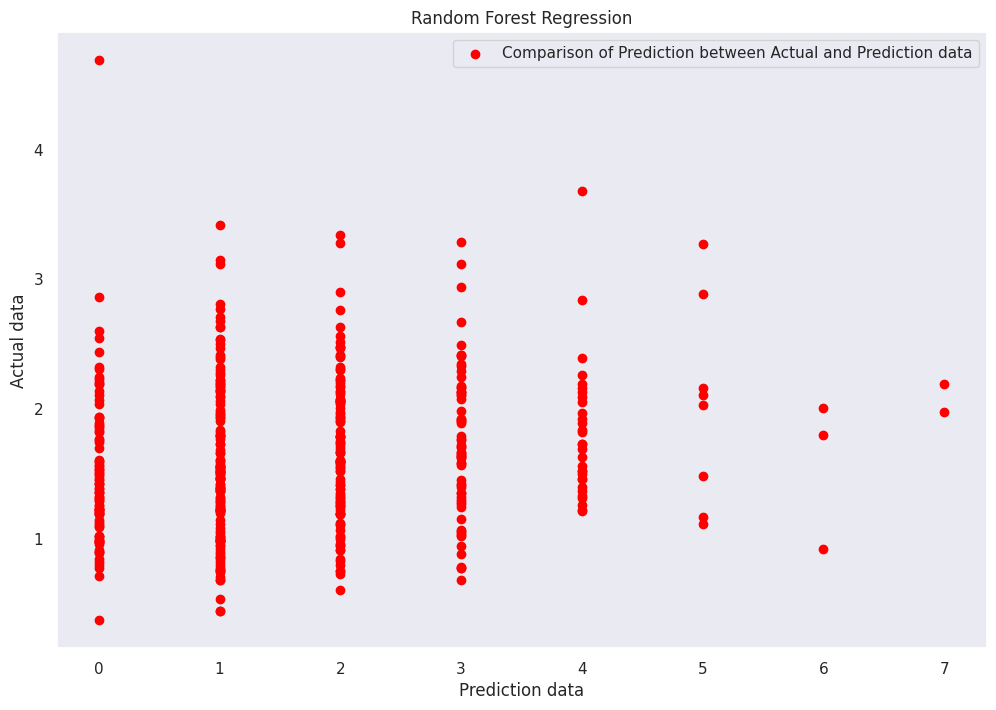

In [ ]:
#Plotting a graph of Comparison of Prediction between actual and predict data
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, color="red", label="Comparison of Prediction between Actual and Prediction data")
plt.legend()
plt.grid()
plt.title('Random Forest Regression')
plt.xlabel('Prediction data')
plt.ylabel('Actual data')
plt.show()

In [ ]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", metrics.r2_score(y_test, y_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_pred))
print()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.03938537518868479
Mean Squared Error (MSE) 	: 1.8933218094220323



In [ ]:
# create a random forest regressor with 1000 trees
regressor_more_n = RandomForestRegressor(n_estimators=1000, random_state=42)
regressor_more_n.fit(x_train, y_train)
y_pred_more_n = regressor_more_n.predict(x_test)
y_pred_more_n = pd.DataFrame(y_pred_more_n, columns=['yPredict_more_n'])

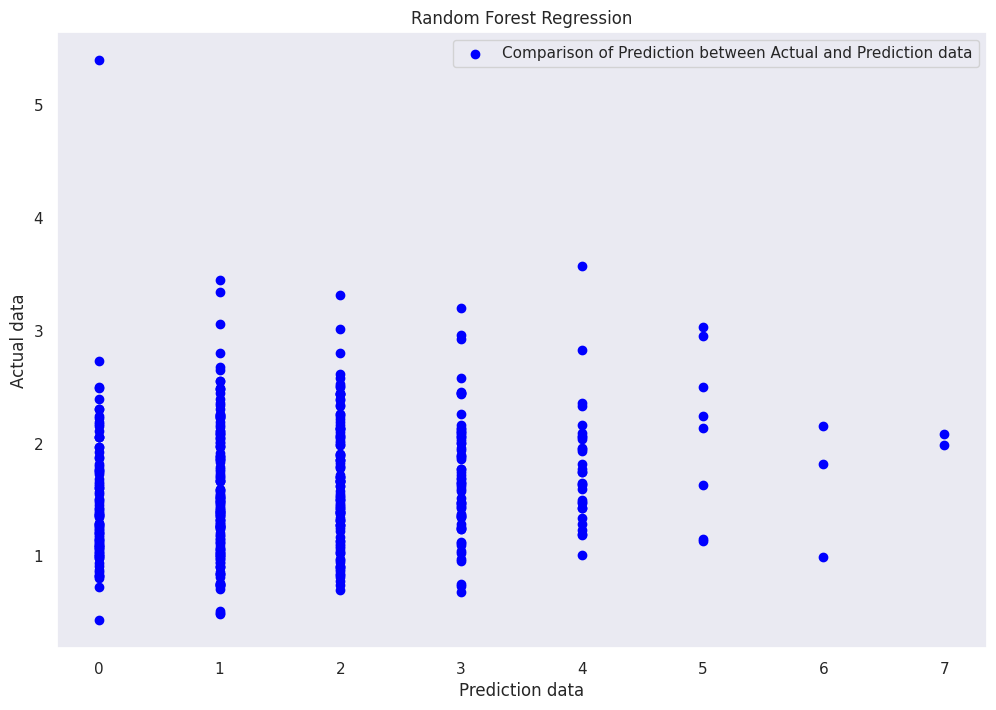

In [ ]:
#Plotting a graph of Comparison of Prediction between actual and predict data
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred_more_n, color="blue", label="Comparison of Prediction between Actual and Prediction data")
plt.legend()
plt.grid()
plt.title('Random Forest Regression')
plt.xlabel('Prediction data')
plt.ylabel('Actual data')
plt.show()

In [ ]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", metrics.r2_score(y_test, y_pred_more_n))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_pred_more_n))
print()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.03525908527958088
Mean Squared Error (MSE) 	: 1.8858054494044725



By comparing the result between 100 trees and 1000 trees, the explained variance increases from -0.039385 to -0.035259, showing a more accurate result. In addition, the mean squared error decreased from 1.89332 to 1.88580, showing a more accurate prediction.

In [ ]:
#Now, we create the same model but for train2 (meaning for predicting FTAG - Full time away goal)
# create a random forest regressor with 100 trees
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(x_train2, y_train2)
y_pred2 = regressor.predict(x_test2)
y_pred2 = pd.DataFrame(y_pred2, columns=['yPredict2'])

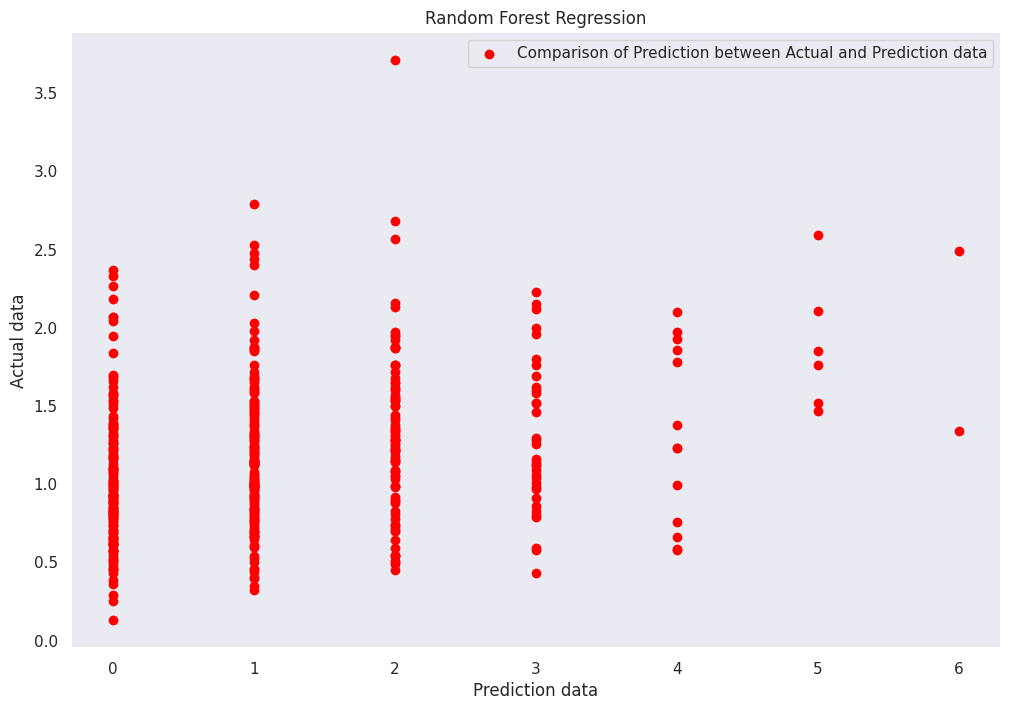

In [ ]:
#Plotting a graph of Comparison of Prediction between actual and predict data
plt.figure(figsize=(12, 8))
plt.scatter(y_test2, y_pred2, color="red", label="Comparison of Prediction between Actual and Prediction data")
plt.legend()
plt.grid()
plt.title('Random Forest Regression')
plt.xlabel('Prediction data')
plt.ylabel('Actual data')
plt.show()

In [ ]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", metrics.r2_score(y_test2, y_pred2))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test2, y_pred2))
print()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.066140099006748
Mean Squared Error (MSE) 	: 1.3154574366400151



In [ ]:
# create a random forest regressor with 1000 trees
regressor_more_n2 = RandomForestRegressor(n_estimators=1000, random_state=42)
regressor_more_n2.fit(x_train2, y_train2)
y_pred_more_n2 = regressor_more_n2.predict(x_test2)
y_pred_more_n2 = pd.DataFrame(y_pred_more_n2, columns=['yPredict_more_n2'])

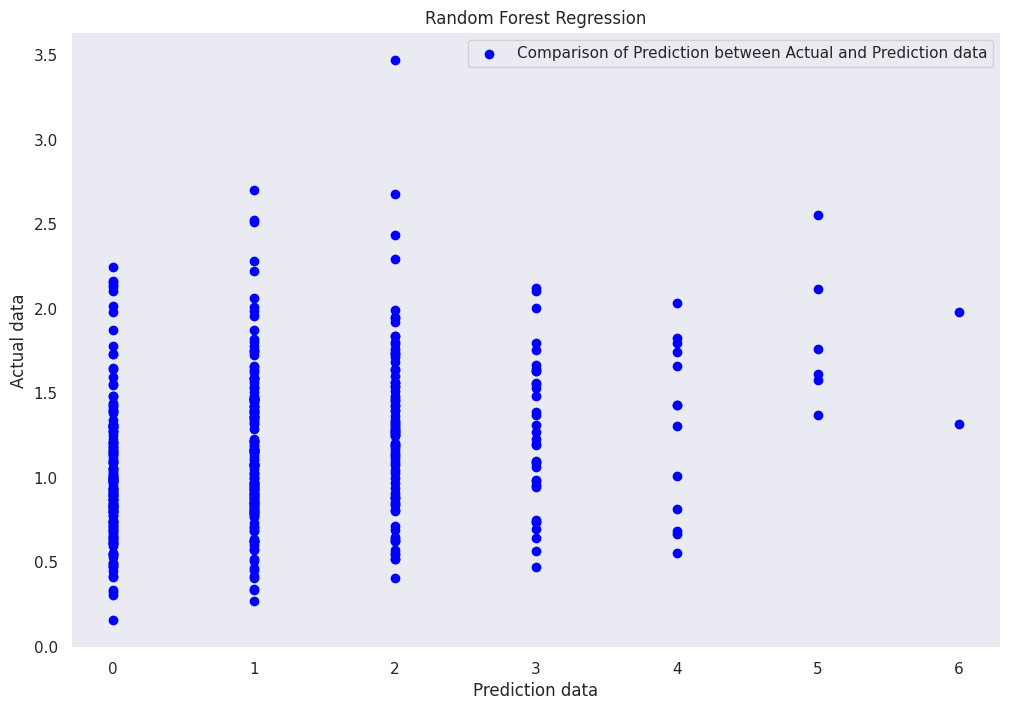

In [ ]:
#Plotting a graph of Comparison of Prediction between actual and predict data
plt.figure(figsize=(12, 8))
plt.scatter(y_test2, y_pred_more_n2, color="blue", label="Comparison of Prediction between Actual and Prediction data")
plt.legend()
plt.grid()
plt.title('Random Forest Regression')
plt.xlabel('Prediction data')
plt.ylabel('Actual data')
plt.show()

In [ ]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", metrics.r2_score(y_test2, y_pred_more_n2))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test2, y_pred_more_n2))
print()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.056576989022703916
Mean Squared Error (MSE) 	: 1.32892826254499



By comparing the result between 100 trees and 1000 trees, the explained variance decreases from 0.06614 to 0.05658, showing a less accurate result. In addition, the mean squared error increases from 1.31546 to 1.32893, showing a less accurate prediction.

The less accurate prediction is odd as the improvement of the model is expected when the value of n-estimnators is increased. 

One possible reason why increasing the number of estimators does not always lead to better performance is overfitting. As the number of estimators increases, the model becomes more complex and can start to memorize the noise in the training data, leading to overfitting. In this case, the model may perform well on the training data, but its performance on the test data may degrade.

Another possible reason is the presence of non-linear relationships between the predictors and the response variable. Random forest regression is based on decision trees, which can capture non-linear relationships, but may still struggle with certain types of non-linear patterns. In this case, increasing the number of estimators may not improve the model's performance.

It is also possible that the data may not have a strong relationship between the predictors and the response variable, in which case, increasing the number of estimators may not lead to significant improvements in performance.

Hence, this model works better in predicting FTHG than FTAG. We are going to still use the random forest regression method to predict the ranking.

In [ ]:
#We are using the predictors for the random forest regression
predictors = ["HTFormPts","ATFormPts","HTGD","ATGD","DiffPts","DiffFormPts"]# Extract Predictors for Prediction
x_pred2 = pd.DataFrame(data20172018[predictors])

# Predict Response corresponding to Predictors
y_pred2 = regressor.predict(x_pred2)

# Summarize the Actuals, Predictions and Errors
y_pred2 = pd.DataFrame(y_pred2, columns = ["Predicted_FTAG"], index = data20172018.index)
score_acc2 = pd.concat([data20172018[["HomeTeam","AwayTeam","FTAG"]], y_pred2], axis = 1)

y_errs2 = 100 * abs(score_acc2["FTAG"] - score_acc2["Predicted_FTAG"]) / score_acc2["FTAG"]
y_errs2 = pd.DataFrame(y_errs2, columns = ["Error"], index = data20172018.index)
score_acc2 = pd.concat([score_acc2, y_errs2], axis = 1)

score_acc2

,HomeTeam,AwayTeam,FTAG,Predicted_FTAG,Error
0,Bournemouth,Watford,2,1.076833,46.158333
1,Burnley,West Brom,1,0.452500,54.750000
2,Liverpool,Crystal Palace,0,2.185000,inf
3,Southampton,West Ham,2,2.165000,8.250000
4,Stoke,Arsenal,0,0.999524,inf
...,...,...,...,...,...
293,Newcastle,Chelsea,0,1.190000,inf
294,Southampton,Man City,1,1.850000,85.000000
295,Swansea,Stoke,2,1.350000,32.500000
296,Tottenham,Leicester,4,0.600000,85.000000


In [ ]:
predicted_vs_actual_rf = pd.concat([data20172018[["HomeTeam","AwayTeam","FTHG","FTAG"]], y_pred, y_pred2], axis = 1)
predicted_vs_actual_rf

,HomeTeam,AwayTeam,FTHG,FTAG,yPredict,Predicted_FTAG
0,Bournemouth,Watford,0.0,2.0,1.320000,1.076833
1,Burnley,West Brom,0.0,1.0,1.230000,0.452500
2,Liverpool,Crystal Palace,1.0,0.0,1.708333,2.185000
3,Southampton,West Ham,3.0,2.0,0.956667,2.165000
4,Stoke,Arsenal,1.0,0.0,2.680000,0.999524
...,...,...,...,...,...,...
444,NaN,NaN,NaN,NaN,2.140000,NaN
445,NaN,NaN,NaN,NaN,1.740000,NaN
446,NaN,NaN,NaN,NaN,1.704667,NaN
447,NaN,NaN,NaN,NaN,2.630000,NaN


In [ ]:
#Computing Original Point Table for 2017-2018
factors = ["Teams", "Matches", "Pts", "GoalDiff"]

#Array for variables to be created
matches = [0]*18
goal_diff = [0]*18
pts = [0]*18
goal_diff_predict = [0]*18
pts_predict = [0]*18

#Combining all the arrays into one for inserting into table
variables = [team, matches, pts, goal_diff]
variables_predict = [team, matches, pts_predict, goal_diff_predict]

#Creating premier league original and predicted tables for one particular season
pl_original_rf = pd.DataFrame(data=None,columns=factors[:])
pl_predict_rf = pd.DataFrame(data=None,columns=factors[:])

#Running a loop for each team
for i in range(len(team)):
  #initialising all variables to zero
  games=away_goals=goal=pt=pt_pred=goal_pred=away_goal_pred=0

  #Running a loop to make the team traverse through the table created above which contains predicted scores and actual scores for each match in that season
  for j in range(len(predicted_vs_actual_rf)):

    #Count the number of games played by each team
    if((predicted_vs_actual_rf["HomeTeam"][j] == team[i]) or (predicted_vs_actual_rf["AwayTeam"][j] == team[i])):
      games+=1

    #Considering cases for team playing home team matches
    if(predicted_vs_actual_rf["HomeTeam"][j] == team[i]):
      goal+=predicted_vs_actual_rf["FTHG"][j]
      goal_pred+=predicted_vs_actual_rf["yPredict"][j]
      away_goals+=predicted_vs_actual_rf["FTAG"][j]
      away_goal_pred+=predicted_vs_actual_rf["Predicted_FTAG"][j]

      #Adding pts for winning matches (actual)
      if(predicted_vs_actual_rf["FTHG"][j] > predicted_vs_actual_rf["FTAG"][j]):
        pt+=3

      #Adding pts for draw matches (actual)
      elif(predicted_vs_actual_rf["FTHG"][j] == predicted_vs_actual_rf["FTAG"][j]):
        pt+=1

      #Adding pts for winning matches (predicted)
      if(predicted_vs_actual_rf["yPredict"][j] > predicted_vs_actual_rf["Predicted_FTAG"][j]):
        pt_pred+=3

      #Adding pts for draw matches (predicted)
      elif(predicted_vs_actual_rf["yPredict"][j] == predicted_vs_actual_rf["Predicted_FTAG"][j]):
        pt_pred+=1

    #Considering cases for team playing away team matches
    elif(predicted_vs_actual_rf["AwayTeam"][j] == team[i]):
      goal+=predicted_vs_actual_rf["FTAG"][j]
      goal_pred+=predicted_vs_actual_rf["Predicted_FTAG"][j]
      away_goals+=predicted_vs_actual_rf["FTHG"][j]
      away_goal_pred+=predicted_vs_actual_rf["yPredict"][j]

      #Adding pts for winning matches (actual)
      if(predicted_vs_actual_rf["FTHG"][j] < predicted_vs_actual_rf["FTAG"][j]):
        pt+=3

      #Adding pts for draw matches (actual)
      elif(predicted_vs_actual_rf["FTHG"][j] == predicted_vs_actual_rf["FTAG"][j]):
        pt+=1

      #Adding pts for winning matches (predicted)
      if(predicted_vs_actual_rf["yPredict"][j] < predicted_vs_actual_rf["Predicted_FTAG"][j]):
        pt_pred+=3

      #Adding pts for draw matches (predicted)
      elif(predicted_vs_actual_rf["yPredict"][j] == predicted_vs_actual_rf["Predicted_FTAG"][j]):
        pt_pred+=1

  #Updating the calculated values into the arrays for each team
  matches[i] = games
  if(games != 0):
    pts[i] = pt
    pts_predict[i] = pt_pred
    goal_diff[i] = goal - away_goals
    goal_diff_predict[i] = goal_pred - away_goal_pred

#Inserting arrays into premier league original and predicted tables for one particular season
for k in range(len(variables)):
  pl_original_rf[factors[k]] =  variables[k]
  pl_predict_rf[factors[k]] = variables_predict[k]

#Sorting the table according to pts and if pts are same according to goal differences like how orginal premier league table looks  
pl_original_rf = pl_original_rf.sort_values(by=['Pts','GoalDiff'], ascending=False)
pl_predict_rf = pl_predict_rf.sort_values(by=['Pts','GoalDiff'], ascending=False)
pl_original_rf = pl_original_rf.reset_index()
pl_predict_rf = pl_predict_rf.reset_index()
pl_original_rf.drop(pl_original_rf.columns[pl_original_rf.columns.str.contains('index',case = False)],axis = 1, inplace = True)
pl_predict_rf.drop(pl_predict_rf.columns[pl_predict_rf.columns.str.contains('index',case = False)],axis = 1, inplace = True)


In [ ]:
#Actual data from what happened in EPL season 2017-2018
pl_original_rf

,Teams,Matches,Pts,GoalDiff
0,Man City,34,90,74.0
1,Man United,33,72,35.0
2,Tottenham,33,64,28.0
3,Liverpool,33,62,32.0
4,Chelsea,33,60,17.0
5,Arsenal,33,51,15.0
6,Burnley,33,47,-4.0
7,Newcastle,33,40,-5.0
8,Watford,33,39,-15.0
9,Crystal Palace,34,37,-10.0


In [ ]:
#Predicted data by using random forest regression model
pl_predict_rf

,Teams,Matches,Pts,GoalDiff
0,Man City,34,72,17.109976
1,Tottenham,33,66,8.349952
2,Chelsea,33,66,7.072333
3,Man United,33,63,10.869333
4,Liverpool,33,63,10.051667
5,Burnley,33,57,-0.903667
6,Bournemouth,33,57,-1.055667
7,Arsenal,33,48,-0.649286
8,West Ham,33,48,-0.803226
9,Everton,33,48,-3.156452


In [ ]:
#To display actual and predicted premier league tables side by side for comparison
df1_styler = pl_original_rf.style.set_table_attributes("style='display:inline'").set_caption('Original Data')
df2_styler = pl_predict_rf.style.set_table_attributes("style='display:inline'").set_caption('Predicted Data')
df2_t_styler = pl_predict_rf.T.style.set_table_attributes("style='display:inline'").set_caption('df2_t')
space = "\xa0" * 10

display_html(df1_styler._repr_html_()+space+df2_styler._repr_html_(), raw=True)

,Teams,Matches,Pts,GoalDiff
0,Man City,34,90,74.000000
1,Man United,33,72,35.000000
2,Tottenham,33,64,28.000000
3,Liverpool,33,62,32.000000
4,Chelsea,33,60,17.000000
5,Arsenal,33,51,15.000000
6,Burnley,33,47,-4.000000
7,Newcastle,33,40,-5.000000
8,Watford,33,39,-15.000000
9,Crystal Palace,34,37,-10.000000


In [ ]:
print("Deviation between actual and predicted data for EPL season 2017-2018")
pl_predict_array3 = np.array(pl_predict_rf)
pl_test_array3 = np.array(pl_original_rf)

# extract points columns as float arrays
pts_test3 = pl_test_array3[:, 2].astype(float)
pts_predict3 = pl_predict_array3[:, 2].astype(float)

# compute point differences
diff3 = pts_test3 - pts_predict3

diff_pts3 = np.array(diff3)

# Calculate the mean squared error (MSE)
mse3 = np.mean(np.square(diff_pts3))
print("MSE:", mse3)

# Calculate the root mean squared error (RMSE)
rmse3 = np.sqrt(mse3)
print("RMSE:", rmse3)

Deviation between actual and predicted data for EPL season 2017-2018
MSE: 63.388888888888886
RMSE: 7.961713941664124


## **Evaluating the 3 Model**

In [ ]:
#To display actual and predicted premier league tables side by side for comparison
df1_styler = pl_original.style.set_table_attributes("style='display:inline'").set_caption('Original Data')
df2_styler = pl_predict.style.set_table_attributes("style='display:inline'").set_caption('Linear Regression')
df2_t_styler = pl_predict.T.style.set_table_attributes("style='display:inline'").set_caption('df2_t')
df3_styler = pl_predict_nn.style.set_table_attributes("style='display:inline'").set_caption('Neural Network')
df3_t_styler = pl_predict_nn.T.style.set_table_attributes("style='display:inline'").set_caption('df3_t')
df4_styler = pl_predict_rf.style.set_table_attributes("style='display:inline'").set_caption('Random Forest')
df4_t_styler = pl_predict_rf.T.style.set_table_attributes("style='display:inline'").set_caption('df4_t')
space = "\xa0" * 10

display_html(df1_styler._repr_html_()+space+df2_styler._repr_html_()+space+df3_styler._repr_html_()+space+df4_styler._repr_html_(), raw=True)

,Teams,Matches,Pts,GoalDiff
0,Man City,34,90,74
1,Man United,33,72,35
2,Tottenham,33,64,28
3,Liverpool,33,62,32
4,Chelsea,33,60,17
5,Arsenal,33,51,15
6,Burnley,33,47,-4
7,Newcastle,33,40,-5
8,Watford,33,39,-15
9,Crystal Palace,34,37,-10


In [ ]:
print("Deviation for Linear Regression:")
print("MSE:{:.5f}".format(mse))
print("RMSE:{:.5f}".format(rmse))
print()
print("Deviation for Neural Network:")
print("MSE:{:.5f}".format(mse2))
print("RMSE:{:.5f}".format(rmse2))
print()
print("Deviation for Random Forest Regression:")
print("MSE:{:.5f}".format(mse3))
print("RMSE:{:.5f}".format(rmse3))
print()

Deviation for Linear Regression:
MSE:98.05556
RMSE:9.90230

Deviation for Neural Network:
MSE:20.66667
RMSE:4.54606

Deviation for Random Forest Regression:
MSE:63.38889
RMSE:7.96171



As seen above, the most accurate prediction is done by Neural Network, followed by the Random Forest Regression, and lastly by the Linear Regression.

Reasoning: <br>
Neural networks can model highly non-linear relationships between the predictors and response variables. However, linear regression can only model linear relationships. In our context of football, the relationships between variables are highly complex and nonlinear, thus neural networks can capture such relationships better.

Neural networks can generalize well to datasets with large amounts of data, while linear regression may overfit to the training data to a larger extent than random forest regression. Neural networks can achieve this by using regularization techniques such as dropout and weight decay, which prevent the model from memorizing the training data and allowing it to perform well, not only on training dataset. 

From our dataset, we're dealing high volumes of data and factors over a long period of time, hence linear regression may not perform worse compared to random forest regression and neural network.


**Personal Objective:**
<br>
According to our personal objective of predicting the top 6 teams going into Champions/Europea League, we want to see if our favourite teams are able to make it. In the top 6 teams, 5 teams are consistentetly there, which are Man United, Man City, Tottenham, Liverpool, and Chelsea. We can be hopeful in these 5 teams making it to the league since they have a higher likelihood of winning. However, the sixth team is more volatile in predictions and harder to predict from past matches. 
<br>
<br>
However, the data used for predictions are gathered from the past. Recent changes/improvements are not considered in the predictions, such as player trades, new coaches, and additional investments to the clubs. These are all important factors to be considered when making a more thorough ranking predicition.